In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv


**Deskripsi Dataset**

1.	Airline Customer Satisfaction
Dataset ini terdiri dari detail penumpang yang pernah terbang menggunakan jasa maskapai C. Umpan balik pelanggan tentang berbagai konteks dan data penerbangan mereka telah dikonsolidasikan.
Tujuan utama dari kumpulan data ini adalah untuk melihat pola kepuasan pelanggan terhadap rincian nilai parameter lainnya (mis: fasilitas mana yang berkontribusi paling besar terhadap kepuasan pelanggan, fasilitas mana yang masih kurang dan perlu ditingkatkan). Selain itu, maskapai penerbangan perlu mengetahui aspek layanan mana yang ditawarkan oleh mereka yang harus lebih ditekankan untuk memberikan kepuasan yang lebih tinggi kepada penumpang

Detil setiap kolom
-	Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
-	Gender: Gender of the passengers (Female, Male)
-	Customer Type: The customer type (Loyal customer, disloyal customer)
-	Age: The actual age of the passengers
-	Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
-	Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
-	Flight distance: The flight distance of this journey
-	Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable; Likert scale 1 (very dissatisfied) to 5 (very satisfied))
-	Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
-	Ease of Online booking: Satisfaction level of online booking
-	Gate location: Satisfaction level of Gate location
-	Food and drink: Satisfaction level of Food and drink
-	Online boarding: Satisfaction level of online boarding
-	Seat comfort: Satisfaction level of Seat comfort
-	Inflight entertainment: Satisfaction level of inflight entertainment
-	On-board service: Satisfaction level of On-board service
-	Leg room service: Satisfaction level of Leg room service
-	Baggage handling: Satisfaction level of baggage handling
-	Check-in service: Satisfaction level of Check-in service
-	Inflight service: Satisfaction level of inflight service
-	Cleanliness: Satisfaction level of Cleanliness
-	Departure Delay in Minutes: Minutes delayed when departure
-	Arrival Delay in Minutes: Minutes delayed when Arrival
Data tersedia dalam format .xlsx dan .csv (comma separated values)

Kelompok 1 mengerjakan analisis berdasarkan baris-baris ganjil (data ke-1, 3, 5, dst) dan kelompok 2 mengerjakan analisis berdasarkan baris-baris genap (data ke-2, 4, 6, dst). Silakan gunakan fitur sort rows by odd or even number pada Ms. Excel. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
full_data = pd.read_csv('/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv')
odd_data = full_data.iloc[::2].reset_index(drop=True)

In [4]:
odd_data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
2,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
4,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0


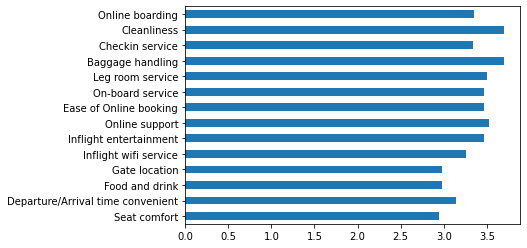

In [5]:
interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]



odd_data[interested_columns].replace({0:np.nan}).mean().plot(kind='barh')




# Exploration

## One Variable Analysis

### Target

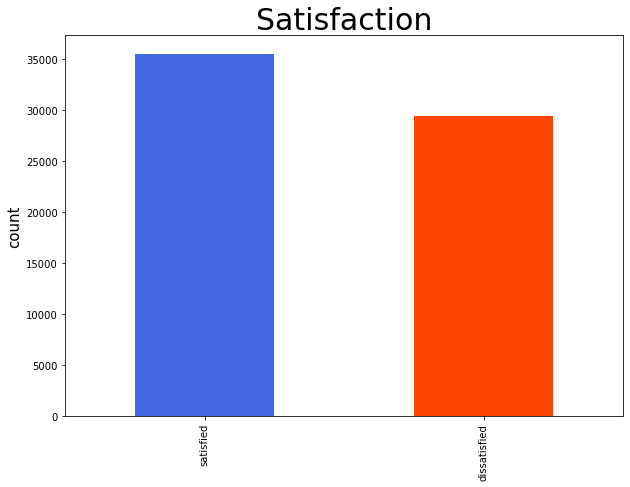

In [6]:
# Mengecek distribusi variabel "Revenue" dan variabel "Weekend" dengan diagram batang
# Buat kanvas untuk visualisasi
fig = plt.figure(figsize=(10,7))

# bagi menjadi dua buah bagian kiri dan kanan
ax1 = fig.add_subplot(111)

# menggambar bar plot yang berisi kolom Revenue pada kanvas ax1
odd_data['satisfaction'].value_counts().plot(kind='bar', ax=ax1,color= ['royalblue','orangered'])
# menggambar bar plot yang berisi kolom Weekend pada kanvas ax2
# data['Weekend'].value_counts().plot(kind='bar', ax=ax2, color='#B00051')

ax1.set_title("Satisfaction", fontdict={'fontsize' : '30'})
# memberi judul pada sumbu x kanvas ax1
# ax1.set_xlabel("Satisfied or not", fontdict={'fontsize' : '15'})
# memberi judul pada sumbu y kanvas ax1
ax1.set_ylabel("count", fontdict={'fontsize' : '15'})

ax1.grid(False)


# menampilkan chart
fig.show()

### Categorical

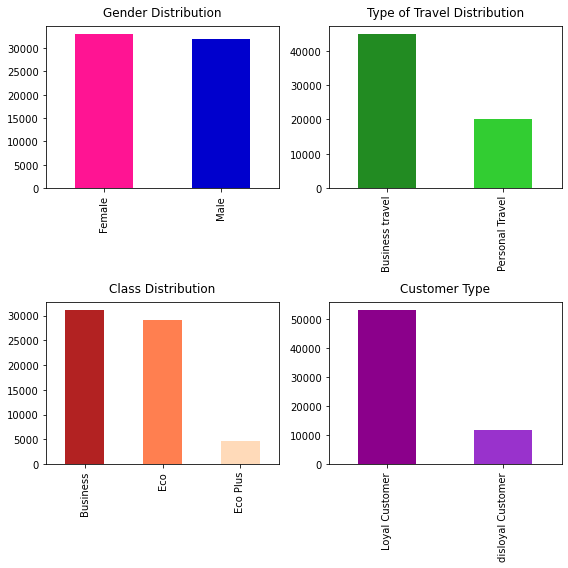

In [7]:
fig = plt.figure(figsize=(8,8))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# mari menggunakan plot bawaan dari pandas
# formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# masukan nilai kind = hist
# melihat distribusi dari humiditas 
odd_data['Gender'].value_counts().plot(kind='bar', ax=ax1, color = ['deeppink','mediumblue'])

# melihat distribusi kecepatan angin 
odd_data['Type of Travel'].value_counts().plot(kind='bar', ax=ax2, color = ['forestgreen','limegreen'])

# melihat distribusi temperatur
odd_data['Class'].value_counts().plot(kind='bar', ax=ax3, color = ['firebrick','coral','peachpuff'])

# melihat distribusi temperatur relatif 
odd_data['Customer Type'].value_counts().plot(kind='bar', ax=ax4, color = ['darkmagenta','darkorchid'])

# tambahkan judul untuk tiap plot
ax1.set_title("Gender Distribution", fontdict={'fontsize': '12'}, pad = 10)
ax2.set_title("Type of Travel Distribution", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Class Distribution", fontdict={'fontsize': '12'}, pad = 10)
ax4.set_title("Customer Type", fontdict={'fontsize': '12'}, pad = 10)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)


# rapihkan plot
fig.tight_layout()

### Numerical

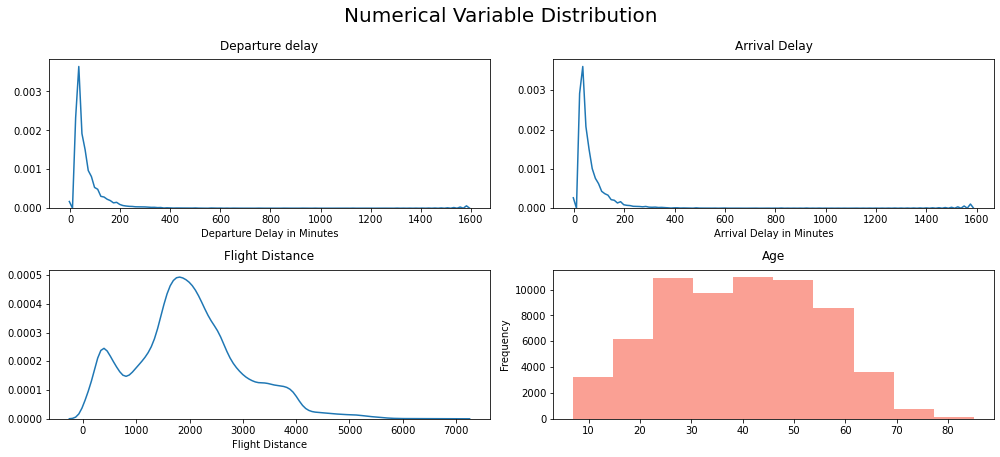

In [8]:
fig = plt.figure(figsize=(14,6))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



# mari menggunakan plot bawaan dari pandas
# formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# masukan nilai kind = hist
# melihat distribusi dari humiditas 
# odd_data['Departure Delay in Minutes'].plot(kind='displot', ax=ax1, color = "#0A5E2AFF")

sns.distplot(odd_data['Departure Delay in Minutes'],hist=False,ax=ax1)

# melihat distribusi kecepatan angin 
# odd_data['Arrival Delay in Minutes'].plot(kind='hist', ax=ax2, color = "#6DAC4FFF")

sns.distplot(odd_data['Arrival Delay in Minutes'],hist=False,ax=ax2)

# melihat distribusi temperatur
# odd_data['Flight Distance'].plot(kind='hist', ax=ax3, color = "#FAA094FF")

sns.distplot(odd_data['Flight Distance'],hist=False,ax=ax3)

odd_data['Age'].plot(kind='hist', ax=ax4, color = "#FAA094FF")




# tambahkan judul untuk tiap plot
ax1.set_title("Departure delay", fontdict={'fontsize': '12'}, pad = 10)
ax2.set_title("Arrival Delay", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Flight Distance", fontdict={'fontsize': '12'}, pad = 10)
ax4.set_title("Age", fontdict={'fontsize': '12'}, pad = 10)

fig.suptitle('Numerical Variable Distribution',y=1.05,fontsize=20)
# rapihkan plot
fig.tight_layout()

Text(0.5, 0.98, 'Delay Distribution')

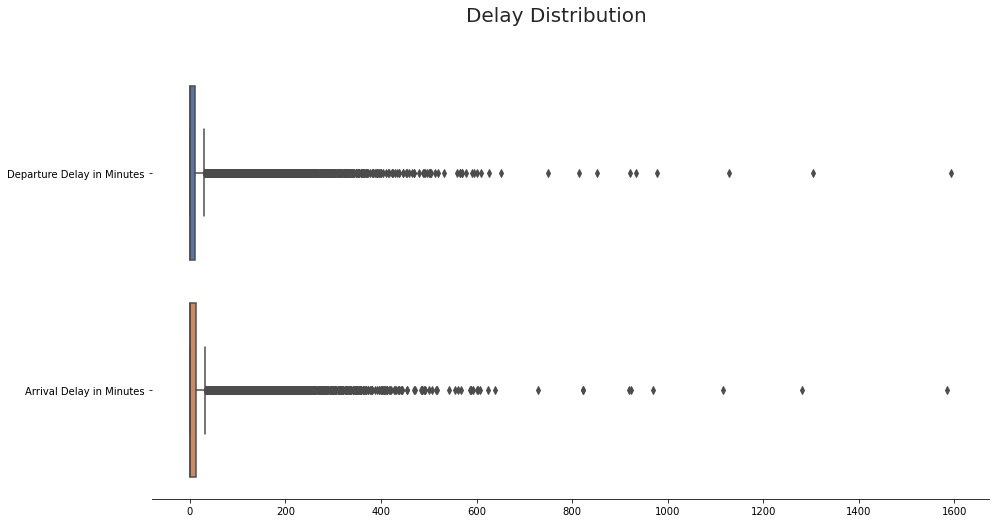

In [9]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
sns.boxplot(data=odd_data[['Departure Delay in Minutes','Arrival Delay in Minutes']], palette="deep",orient="h")
sns.despine(left=True)
fig.suptitle('Delay Distribution',fontsize=20)


In [10]:
pd.options.display.float_format = "{:.2f}".format

x = odd_data[['Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance','Age']].describe()

x

,Departure Delay in Minutes,Arrival Delay in Minutes,Flight Distance,Age
count,64940.00,64736.00,64940.00,64940.00
mean,14.56,14.93,1980.34,39.49
std,38.50,38.93,1027.14,15.14
min,0.00,0.00,50.00,7.00
25%,0.00,0.00,1353.00,27.00
50%,0.00,0.00,1924.00,40.00
75%,12.00,13.00,2544.00,51.00
max,1592.00,1584.00,6948.00,85.00


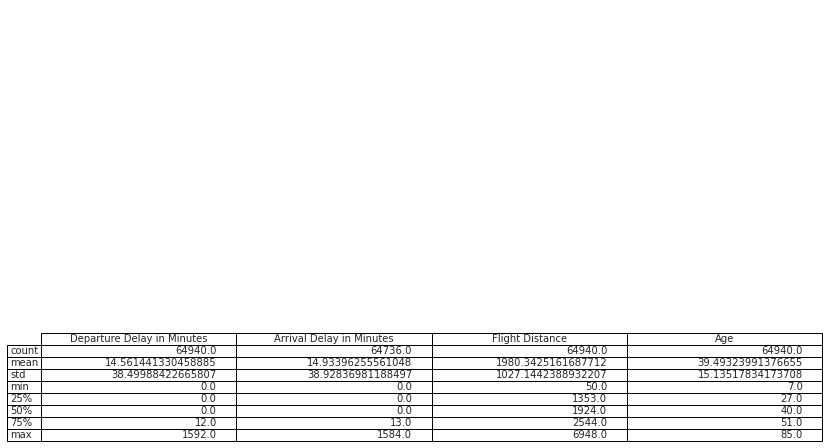

In [11]:
from pandas.plotting import table 
fig = plt.figure(figsize=(14,6))


ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, x)  # where df is your data frame

plt.show()

[None, None]

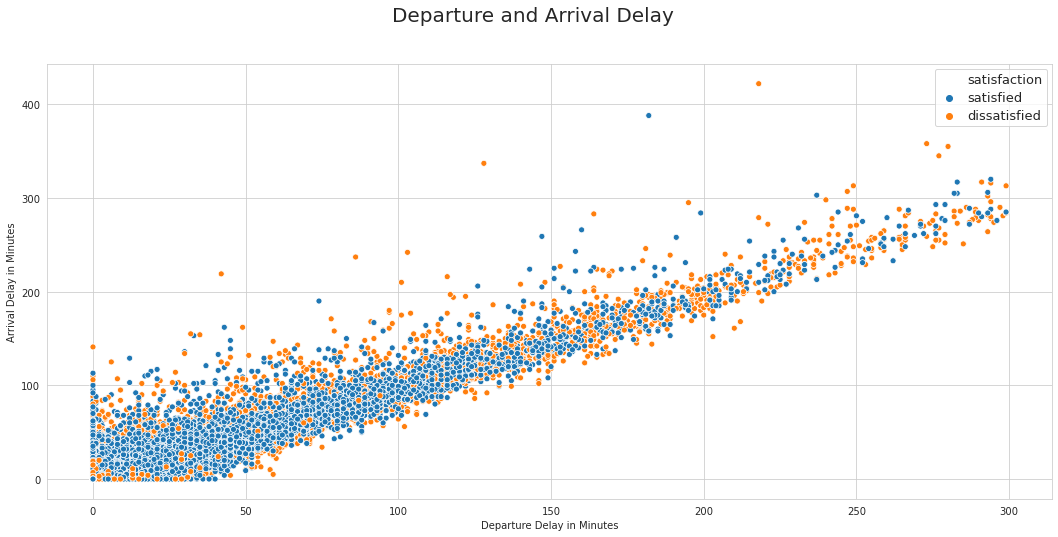

In [12]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=odd_data.loc[odd_data['Departure Delay in Minutes']<300], x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue='satisfaction')

fig.suptitle('Departure and Arrival Delay',fontsize=20)
sns.set_style("whitegrid")

plt.setp(ax.get_legend().get_texts(), fontsize='13') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title


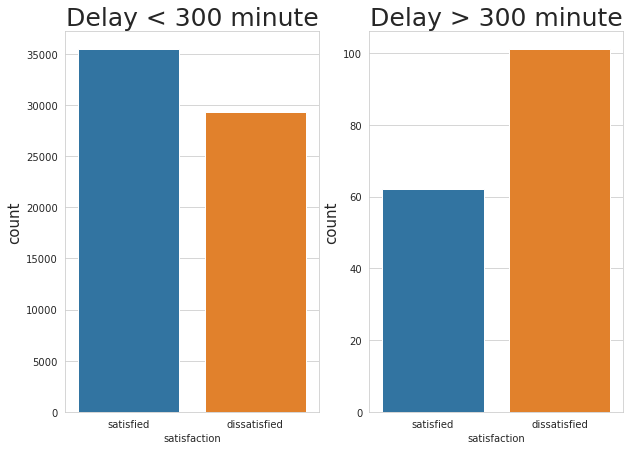

In [13]:
# Mengecek distribusi variabel "Revenue" dan variabel "Weekend" dengan diagram batang
# Buat kanvas untuk visualisasi
fig = plt.figure(figsize=(10,7))

# bagi menjadi dua buah bagian kiri dan kanan
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


# menggambar bar plot yang berisi kolom Revenue pada kanvas ax1
sns.countplot(x="satisfaction",data=odd_data[odd_data['Departure Delay in Minutes']<=300],ax=ax1)

# menggambar bar plot yang berisi kolom Weekend pada kanvas ax2
# data['Weekend'].value_counts().plot(kind='bar', ax=ax2, color='#B00051')
# odd_data.loc[odd_data['Departure Delay in Minutes']>300,'satisfaction'].value_counts().plot(kind='bar', ax=ax1,color= ['orange','royalblue'], order=['satisfied','dissatisfied'])

sns.countplot(x="satisfaction",data=odd_data[odd_data['Departure Delay in Minutes']>300],ax=ax2,order=['satisfied','dissatisfied'])

ax1.set_title("Delay < 300 minute", fontdict={'fontsize' : '25'})
# memberi judul pada sumbu x kanvas ax1
# ax1.set_xlabel("Satisfied or not", fontdict={'fontsize' : '15'})
# memberi judul pada sumbu y kanvas ax1
ax1.set_ylabel("count", fontdict={'fontsize' : '15'})

ax2.set_title("Delay > 300 minute", fontdict={'fontsize' : '25'})
# memberi judul pada sumbu x kanvas ax1
# ax2.set_xlabel("Satisfied or not", fontdict={'fontsize' : '15'})
# memberi judul pada sumbu y kanvas ax1
ax2.set_ylabel("count", fontdict={'fontsize' : '15'})

?


# menampilkan chart
fig.show()

In [14]:
odd_data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

## Two Variable Analysis

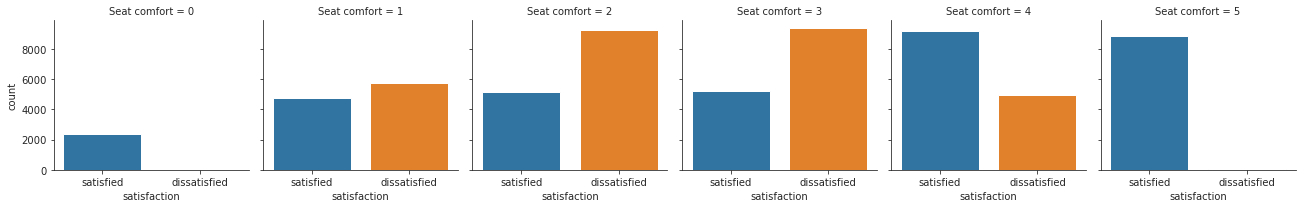

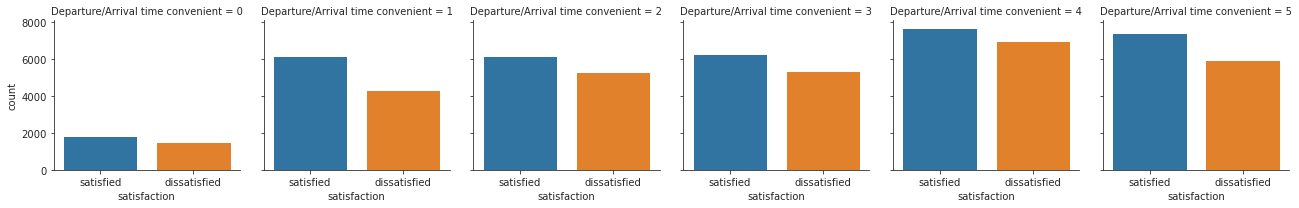

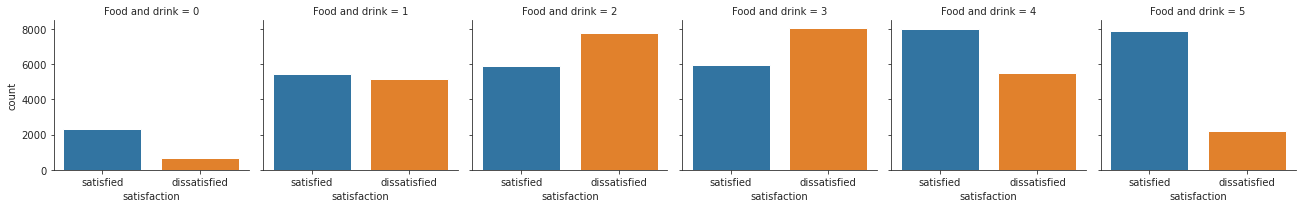

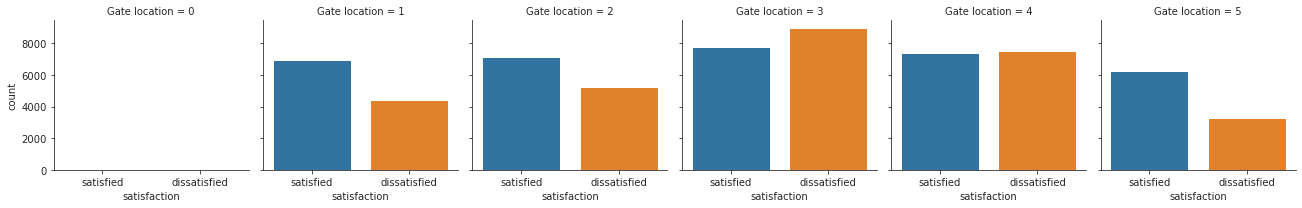

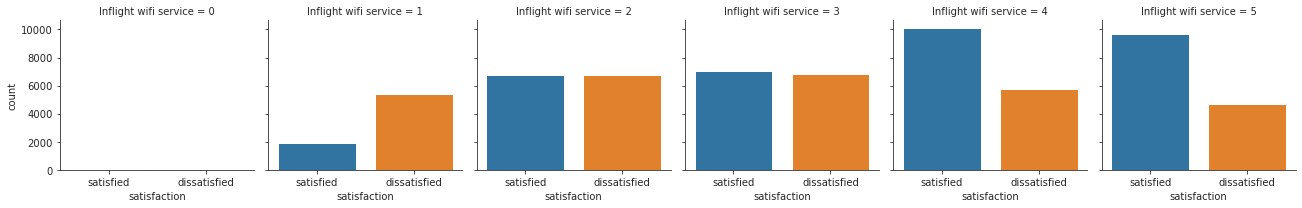

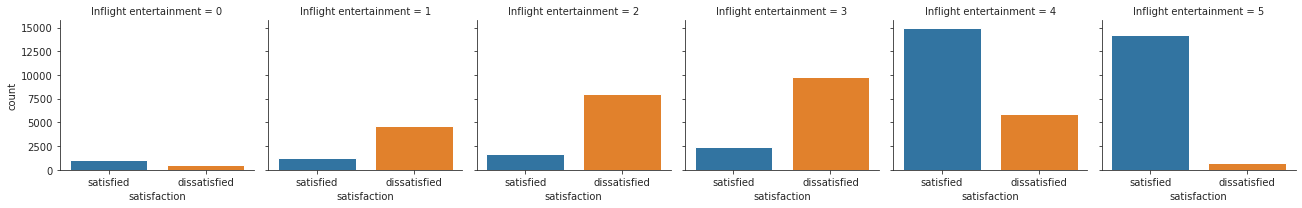

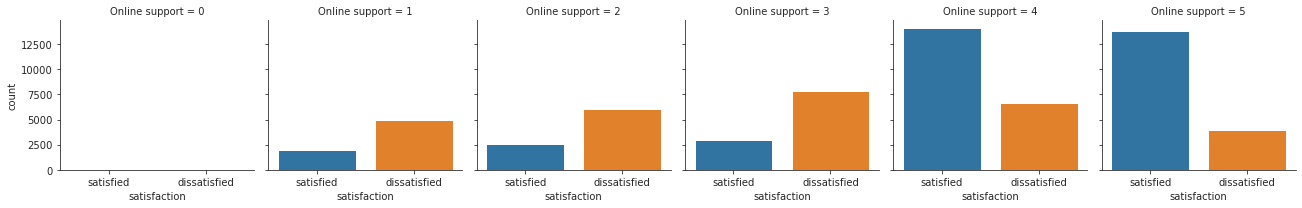

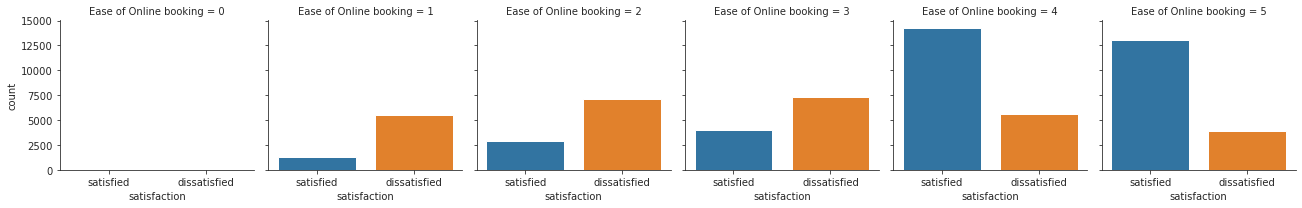

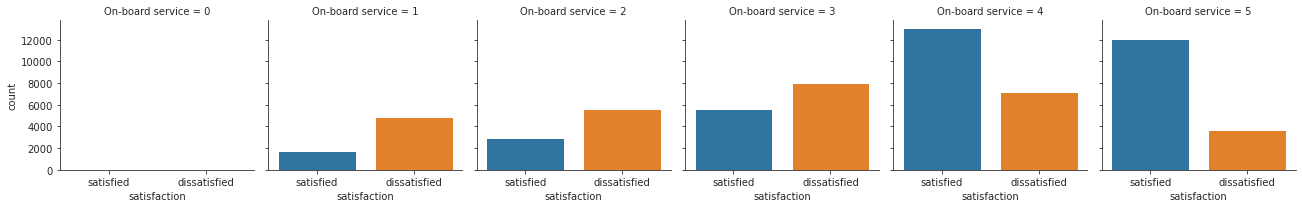

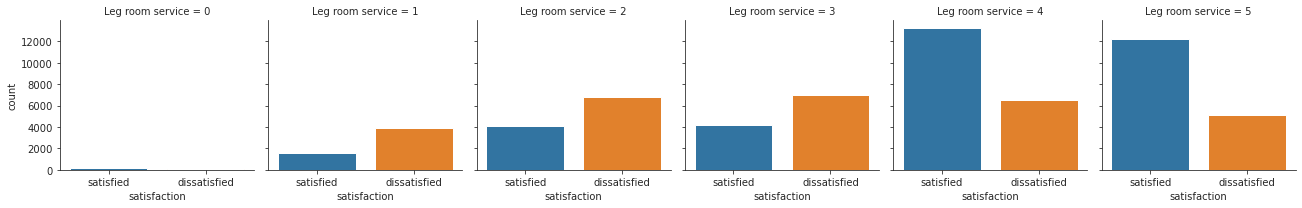

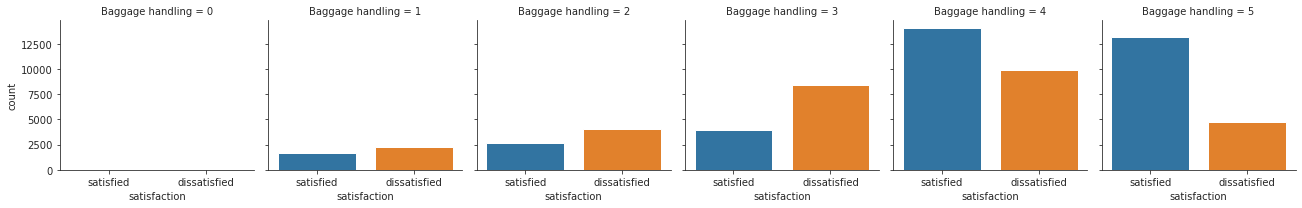

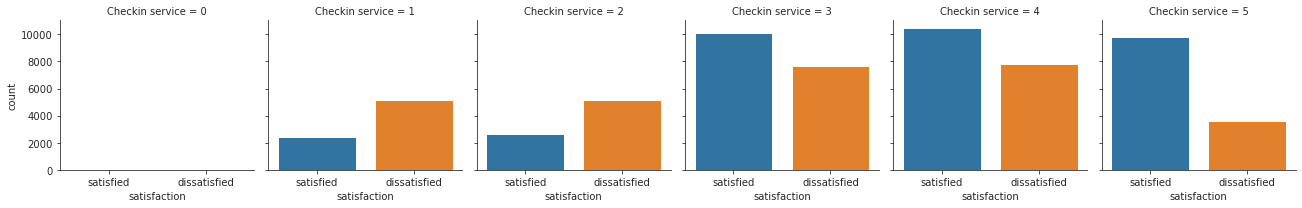

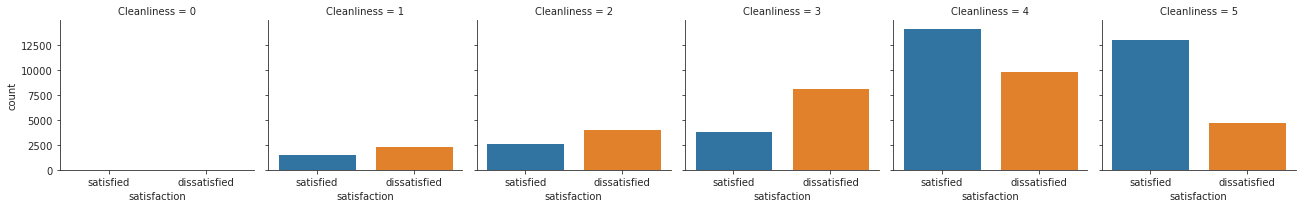

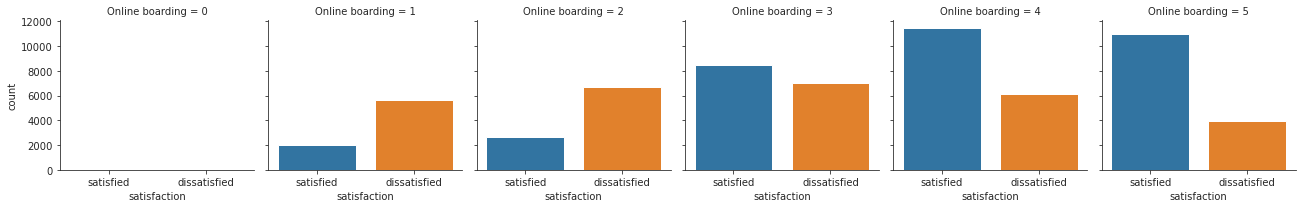

In [15]:
satisfy_col = ['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

df = odd_data.copy()
df.loc[df.iloc[[-1]].index,satisfy_col]=0

with sns.axes_style(style='ticks'):
    
    for i in satisfy_col:
    
        g = sns.catplot("satisfaction", col=i, col_wrap=6, data=df, kind="count", height=3, aspect=1)
    

In [16]:
odd_data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

### categorical vs satisfied

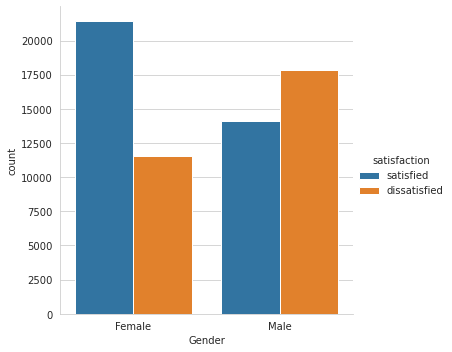

In [17]:
sns.catplot(x="Gender",hue="satisfaction", kind="count", data=odd_data)

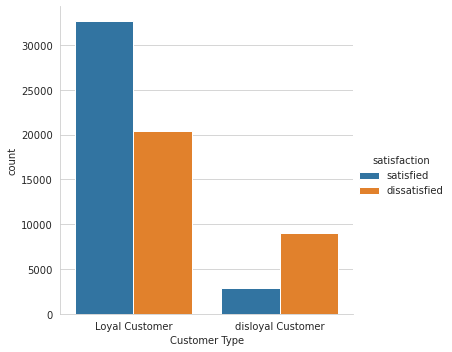

In [18]:
sns.catplot(x="Customer Type",hue="satisfaction", kind="count", data=odd_data)

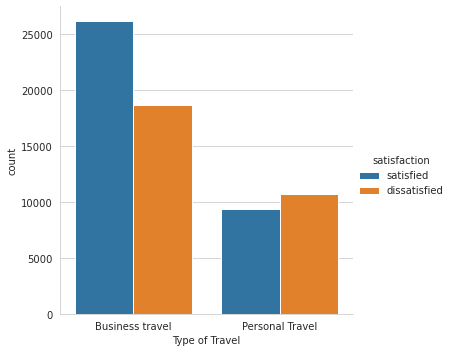

In [19]:
g=sns.catplot(x="Type of Travel",hue="satisfaction", kind="count", data=odd_data,order = ['Business travel','Personal Travel'])




Text(0.5, 0.98, 'Class vs Satisfaction')

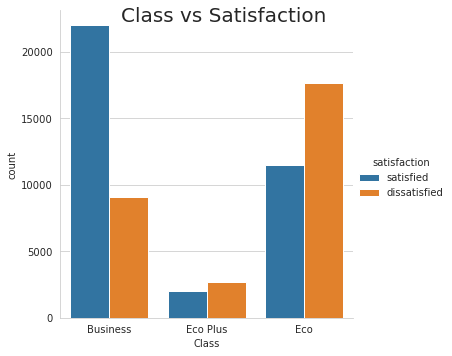

In [20]:
g=sns.catplot(x="Class",hue="satisfaction", kind="count", data=odd_data,order = ['Business','Eco Plus','Eco'])
g.fig.suptitle('Class vs Satisfaction',fontsize=20)

In [21]:
odd_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

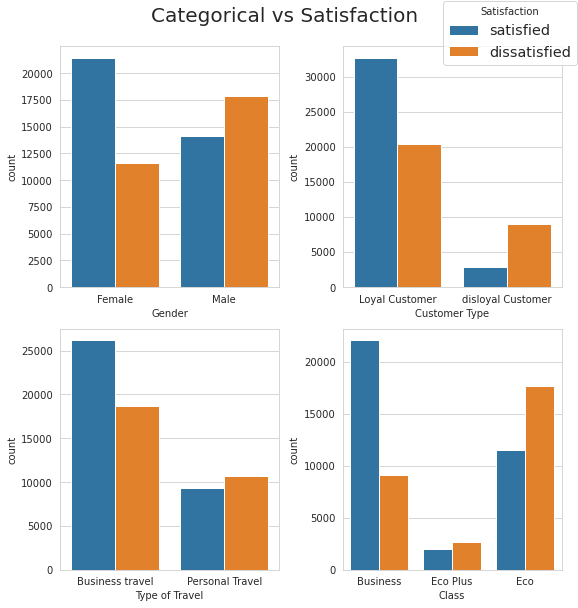

In [22]:
fig = plt.figure(figsize=(8,8))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# mari menggunakan plot bawaan dari pandas
# formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# masukan nilai kind = hist
# melihat distribusi dari humiditas 
sns.countplot(x="Gender",hue="satisfaction", data=odd_data,ax=ax1)

# melihat distribusi kecepatan angin 
sns.countplot(x="Customer Type",hue="satisfaction", data=odd_data, ax=ax2)

# melihat distribusi temperatur
sns.countplot(x="Type of Travel",hue="satisfaction",data=odd_data,order = ['Business travel','Personal Travel'],ax= ax3)

# melihat distribusi temperatur relatif 
sns.countplot(x="Class",hue="satisfaction", data=odd_data,order = ['Business','Eco Plus','Eco'],ax=ax4)

# tambahkan judul untuk tiap plot
# ax1.set_title("Gender Distribution", fontdict={'fontsize': '12'}, pad = 10)
# ax2.set_title("Type of Travel Distribution", fontdict={'fontsize': '12'}, pad = 10)
# ax3.set_title("Class Distribution", fontdict={'fontsize': '12'}, pad = 10)
# ax4.set_title("Customer Type", fontdict={'fontsize': '12'}, pad = 10)

line_labels = ["satisfied", "dissatisfied"]

fig.legend(     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Satisfaction",  # Title for the legend
           fontsize = 'x-large' 
           )

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

fig.suptitle('Categorical vs Satisfaction',fontsize=20,y=1.05)


# rapihkan plot
fig.tight_layout()

### age vs satisfaction

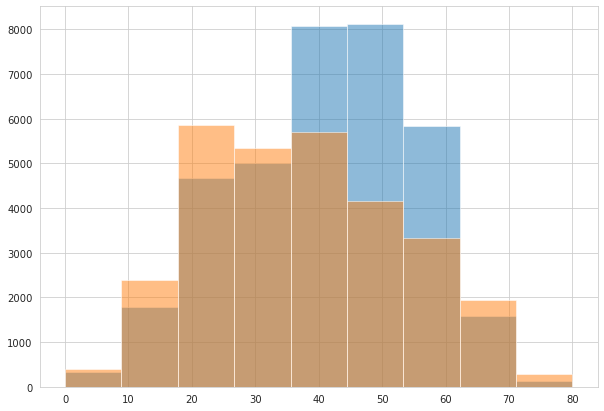

In [23]:
# Mengecek distribusi variabel "Revenue" dan variabel "Weekend" dengan diagram batang
# Buat kanvas untuk visualisasi
fig = plt.figure(figsize=(10,7))

# bagi menjadi dua buah bagian kiri dan kanan
# ax1 = fig.add_subplot(111)

# menggambar bar plot yang berisi kolom Revenue pada kanvas ax1
# odd_data.loc[odd_data['Gender']=='Male',['Age']].plot(kind='hist', color = "#FAA094FF")# menggambar bar plot yang berisi kolom Weekend pada kanvas ax2

# odd_data.loc[odd_data['Gender']=='Female',['Age']].plot(kind='hist', color = "lightcyan")# menggambar bar plot yang berisi kolom Weekend pada kanvas ax2

bins = np.linspace(0, 80, 10)

plt.hist(odd_data.loc[odd_data['satisfaction']=='satisfied','Age'], bins, alpha=0.5, label='x')
plt.hist(odd_data.loc[odd_data['satisfaction']=='dissatisfied','Age'], bins, alpha=0.5, label='y')


# data['Weekend'].value_counts().plot(kind='bar', ax=ax2, color='#B00051')

# ax1.set_title("Satisfied or Not", fontdict={'fontsize' : '30'})
# # memberi judul pada sumbu x kanvas ax1
# ax1.set_xlabel("Satisfied or not", fontdict={'fontsize' : '15'})
# # memberi judul pada sumbu y kanvas ax1
# ax1.set_ylabel("count", fontdict={'fontsize' : '15'})




# menampilkan chart
fig.show()



### age

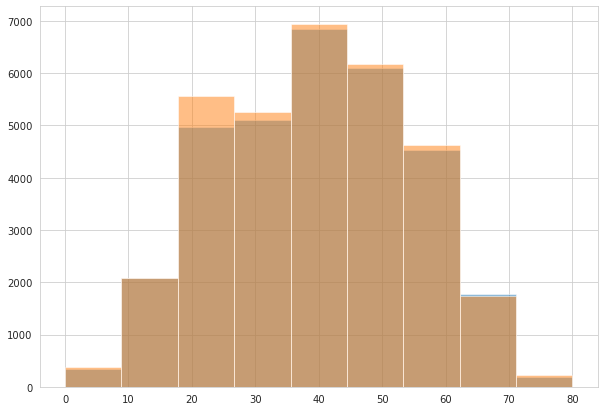

In [24]:
# Mengecek distribusi variabel "Revenue" dan variabel "Weekend" dengan diagram batang
# Buat kanvas untuk visualisasi
fig = plt.figure(figsize=(10,7))

# bagi menjadi dua buah bagian kiri dan kanan
# ax1 = fig.add_subplot(111)

# menggambar bar plot yang berisi kolom Revenue pada kanvas ax1
# odd_data.loc[odd_data['Gender']=='Male',['Age']].plot(kind='hist', color = "#FAA094FF")# menggambar bar plot yang berisi kolom Weekend pada kanvas ax2

# odd_data.loc[odd_data['Gender']=='Female',['Age']].plot(kind='hist', color = "lightcyan")# menggambar bar plot yang berisi kolom Weekend pada kanvas ax2

bins = np.linspace(0, 80, 10)

plt.hist(odd_data.loc[odd_data['Gender']=='Male','Age'], bins, alpha=0.5, label='x')
plt.hist(odd_data.loc[odd_data['Gender']=='Female','Age'], bins, alpha=0.5, label='y')


# data['Weekend'].value_counts().plot(kind='bar', ax=ax2, color='#B00051')

# ax1.set_title("Satisfied or Not", fontdict={'fontsize' : '30'})
# # memberi judul pada sumbu x kanvas ax1
# ax1.set_xlabel("Satisfied or not", fontdict={'fontsize' : '15'})
# # memberi judul pada sumbu y kanvas ax1
# ax1.set_ylabel("count", fontdict={'fontsize' : '15'})




# menampilkan chart
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


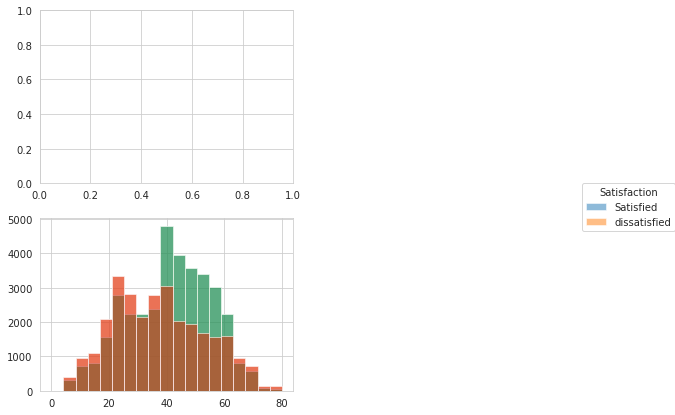

In [25]:

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)

bins = np.linspace(0, 80, 20)

ax1=plt.hist(odd_data.loc[odd_data['satisfaction']=='satisfied','Age'], bins, alpha=0.5, label='x')
ax1=plt.hist(odd_data.loc[odd_data['satisfaction']=='dissatisfied','Age'], bins, alpha=0.5, label='y')

ax2=plt.hist(odd_data.loc[odd_data['satisfaction']=='satisfied','Age'], bins, alpha=0.5, label='a')
ax2=plt.hist(odd_data.loc[odd_data['satisfaction']=='dissatisfied','Age'], bins, alpha=0.5, label='b')

line_labels = ["Satisfied", "dissatisfied"]

fig.legend(['x','y'],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Satisfaction"  # Title for the legend
           )

fig.show()

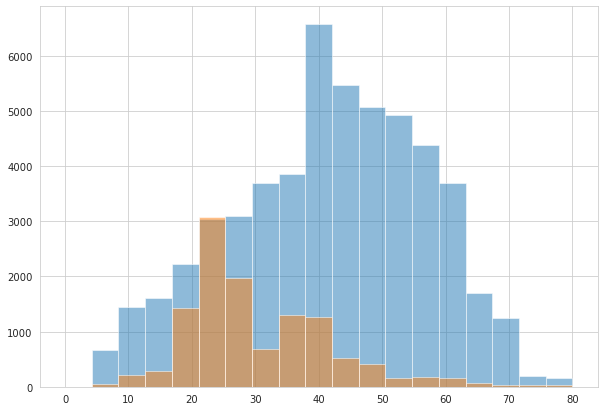

In [26]:
fig = plt.figure(figsize=(10,7))

bins = np.linspace(0, 80, 20)

plt.hist(odd_data.loc[odd_data['Customer Type']=='Loyal Customer','Age'], bins, alpha=0.5, label='x')
plt.hist(odd_data.loc[odd_data['Customer Type']=='disloyal Customer','Age'], bins, alpha=0.5, label='y')

fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app


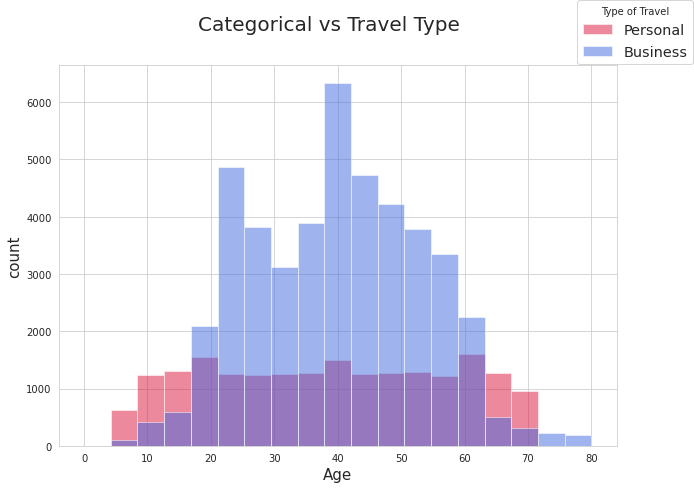

In [27]:
fig = plt.figure(figsize=(10,7))

bins = np.linspace(0, 80, 20)

plt.hist(odd_data.loc[odd_data['Type of Travel']=='Personal Travel','Age'], bins, alpha=0.5, label='x',color='crimson')
plt.hist(odd_data.loc[odd_data['Type of Travel']=='Business travel','Age'], bins, alpha=0.5, label='y',color='royalblue')

line_labels = ["Personal", "Business"]

fig.legend(['x','y'],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Type of Travel",  # Title for the legend
           fontsize = 'x-large'
          )

fig.suptitle('Categorical vs Travel Type',fontsize=20,)

plt.xlabel("Age", fontdict={'fontsize' : '15'})
# memberi judul pada sumbu y kanvas ax1
plt.ylabel("count", fontdict={'fontsize' : '15'})

fig.show()

Text(0.5, 0.98, 'Age distribution on Type of Travel')

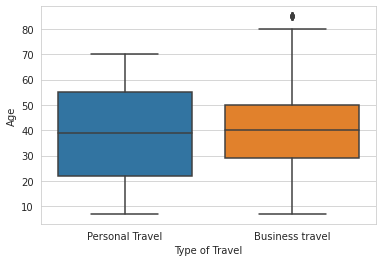

In [28]:
sns.boxplot(x="Type of Travel", y="Age",  data=odd_data)
fig.suptitle('Age distribution on Type of Travel',fontsize=20,)


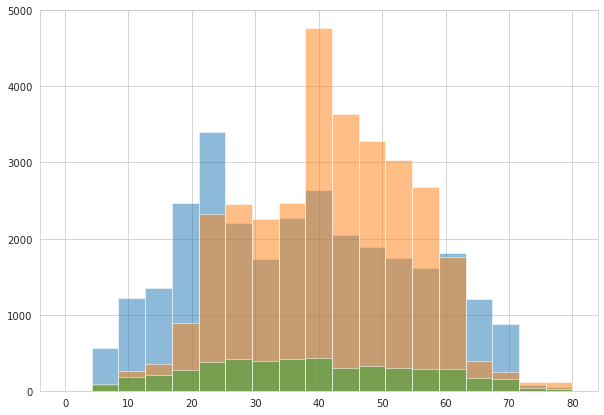

In [29]:
fig = plt.figure(figsize=(10,7))

bins = np.linspace(0, 80, 20)

plt.hist(odd_data.loc[odd_data['Class']=='Eco','Age'], bins, alpha=0.5, label='x')
plt.hist(odd_data.loc[odd_data['Class']=='Business','Age'], bins, alpha=0.5, label='y')
plt.hist(odd_data.loc[odd_data['Class']=='Eco Plus','Age'], bins, alpha=0.5, label='z')


fig.show()

In [30]:
odd_data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [31]:
odd_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

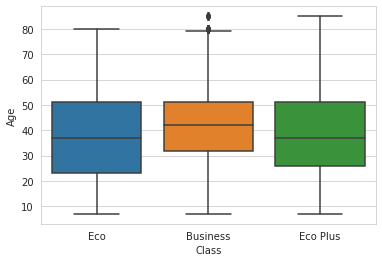

In [32]:
sns.boxplot(x="Class", y="Age",  data=odd_data)


### gender

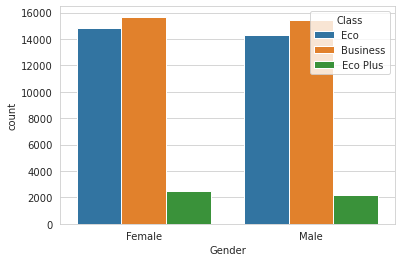

In [33]:
sns.countplot(x="Gender", hue="Class",  data=odd_data)


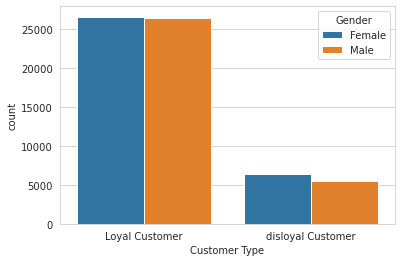

In [34]:
sns.countplot(x="Customer Type", hue="Gender",  data=odd_data)

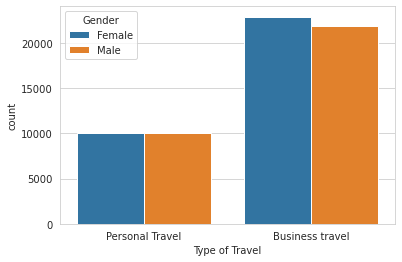

In [35]:
sns.countplot(x="Type of Travel", hue="Gender",  data=odd_data)

### Type of Travel

Text(0.5, 1.0, 'Class and Type of Travel')

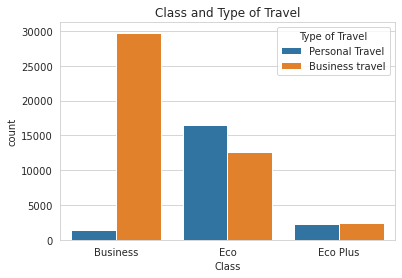

In [36]:
fig_dims = (15, 12)



sns.countplot(x="Class", hue="Type of Travel",  data=odd_data, order=['Business','Eco','Eco Plus'])

plt.title('Class and Type of Travel')



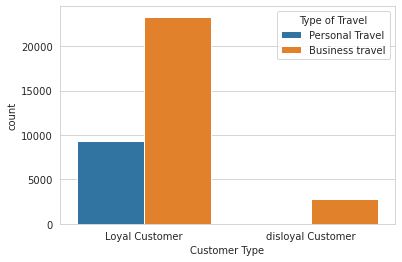

In [37]:
sns.countplot(x="Customer Type", hue="Type of Travel",  data=odd_data.loc[odd_data['satisfaction']=='satisfied'])

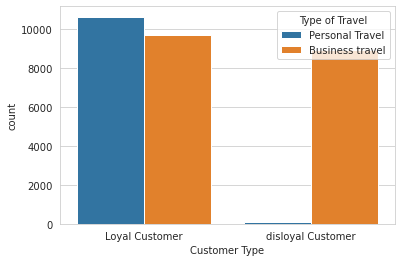

In [38]:
sns.countplot(x="Customer Type", hue="Type of Travel",  data=odd_data.loc[odd_data['satisfaction']=='dissatisfied'])

Text(0.5, 1.1, 'Class, Loyalty, and Satisfaction')

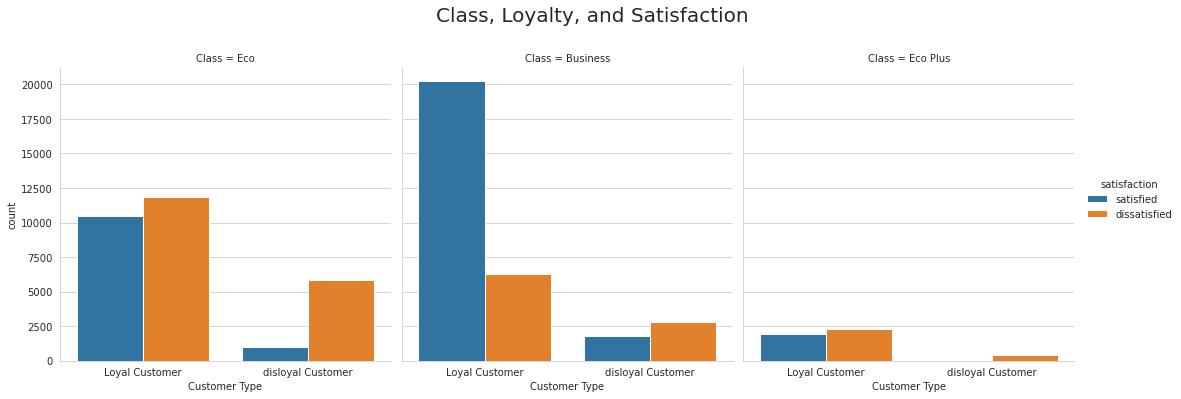

In [39]:
fig_dims = (15, 12)

g=sns.catplot(x="Customer Type", hue="satisfaction", col="Class",
                data=odd_data, kind="count"
                )
g.fig.suptitle('Class, Loyalty, and Satisfaction',fontsize=20,y=1.1)

Text(0.5, 1.1, 'Customer Type, Loyalty, and Satisfaction')

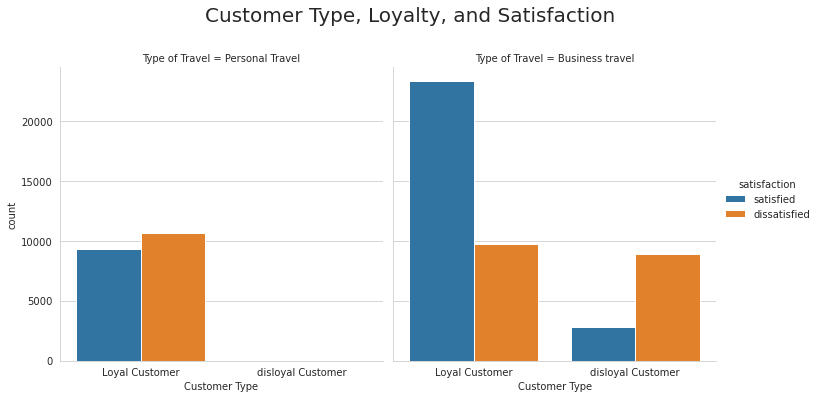

In [40]:
fig_dims = (15, 12)

g=sns.catplot(x="Customer Type", hue="satisfaction", col="Type of Travel",
                data=odd_data, kind="count"
                )
g.fig.suptitle('Customer Type, Loyalty, and Satisfaction',fontsize=20,y=1.1)

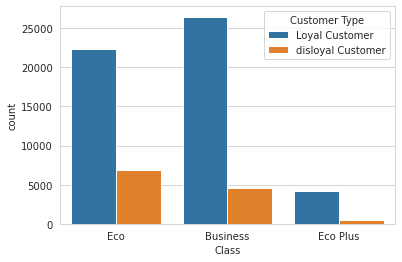

In [41]:
sns.countplot(x="Class", hue="Customer Type",  data=odd_data)

### delay to satisfaction

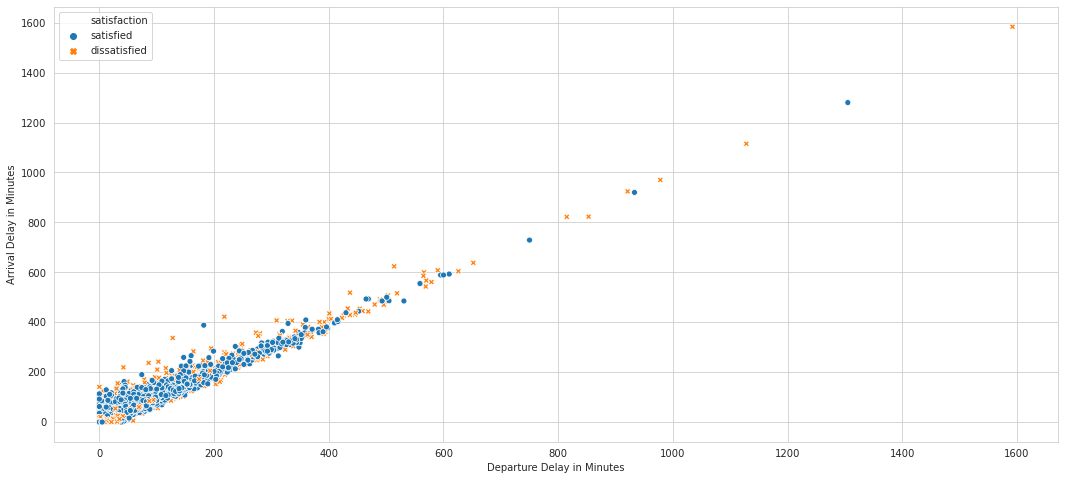

In [42]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
sns.scatterplot(data=odd_data, x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="satisfaction", style="satisfaction")

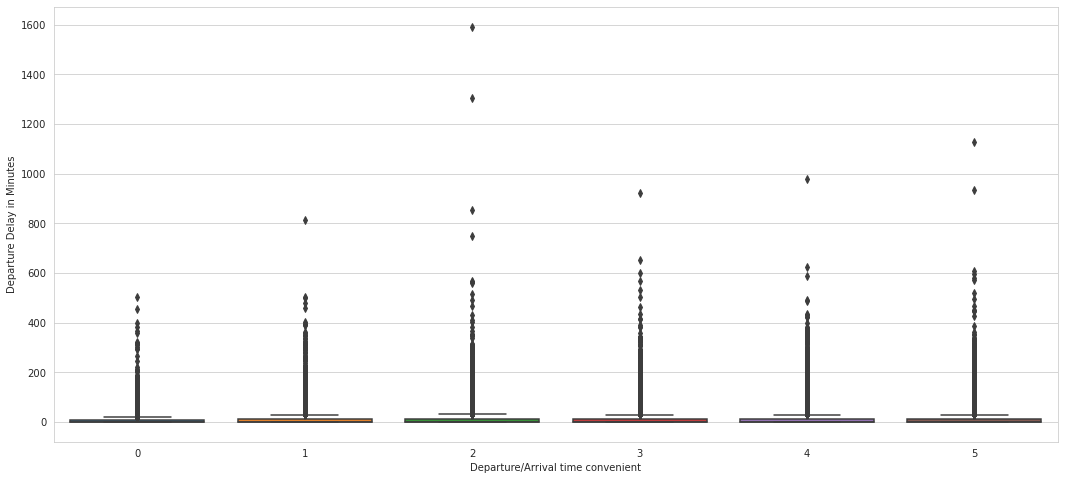

In [43]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
sns.boxplot(data=odd_data, y="Departure Delay in Minutes", x="Departure/Arrival time convenient")

### Correlation

In [44]:
corr=odd_data.copy()
corr=pd.get_dummies(corr,columns=['Class'])
corr=pd.get_dummies(corr,drop_first=True)

In [45]:
corr.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,65,265,0,0,0,2,2,4,2,3,...,2,0,0.00,0,1,0,1,0,0,1
1,15,2138,0,0,0,3,2,0,2,2,...,2,0,0.00,0,1,0,1,0,0,1
2,70,354,0,0,0,3,4,3,4,2,...,5,0,0.00,0,1,0,1,0,0,1
3,66,227,0,0,0,3,2,5,5,5,...,3,17,15.00,0,1,0,1,0,0,1
4,56,73,0,0,0,3,5,3,5,4,...,4,0,0.00,1,0,0,1,0,0,1


In [46]:
corr.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'satisfaction_satisfied', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')

In [47]:
corr.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'satisfaction_satisfied', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')

Text(0.5, 0.9, 'All Variable')

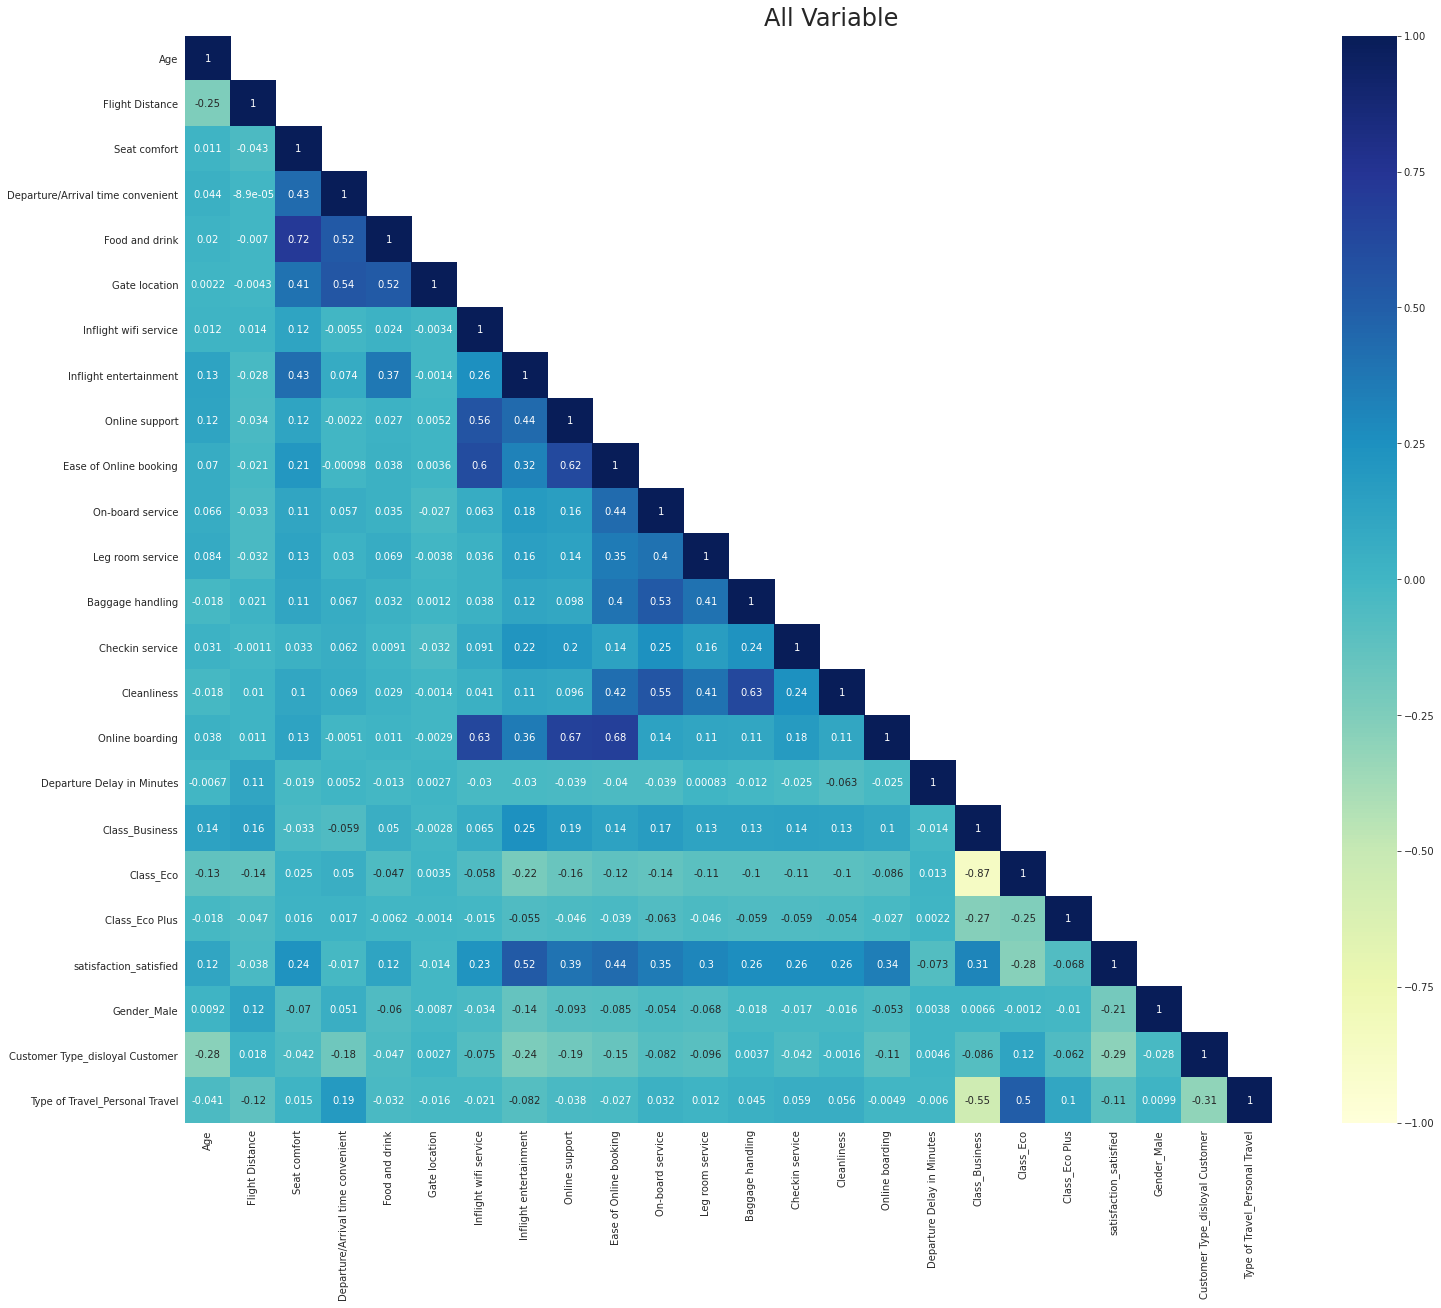

In [48]:
# tulis kolom yang ingin dianalisis korelasinya 
interested_columns = ['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 
       'Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'satisfaction_satisfied', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel']

# hitung korelasi antar kolom
corr_dat = corr[interested_columns].corr()

# visualisasikan korelasinya 
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)

sns.set_style("white")
# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask,vmax=1,vmin=-1, square=True, annot=True, ax = ax,cmap='YlGnBu')

fig.suptitle('All Variable',fontsize=24,y=0.9)


Text(0.5, 0.9, 'Satisfaction Component')

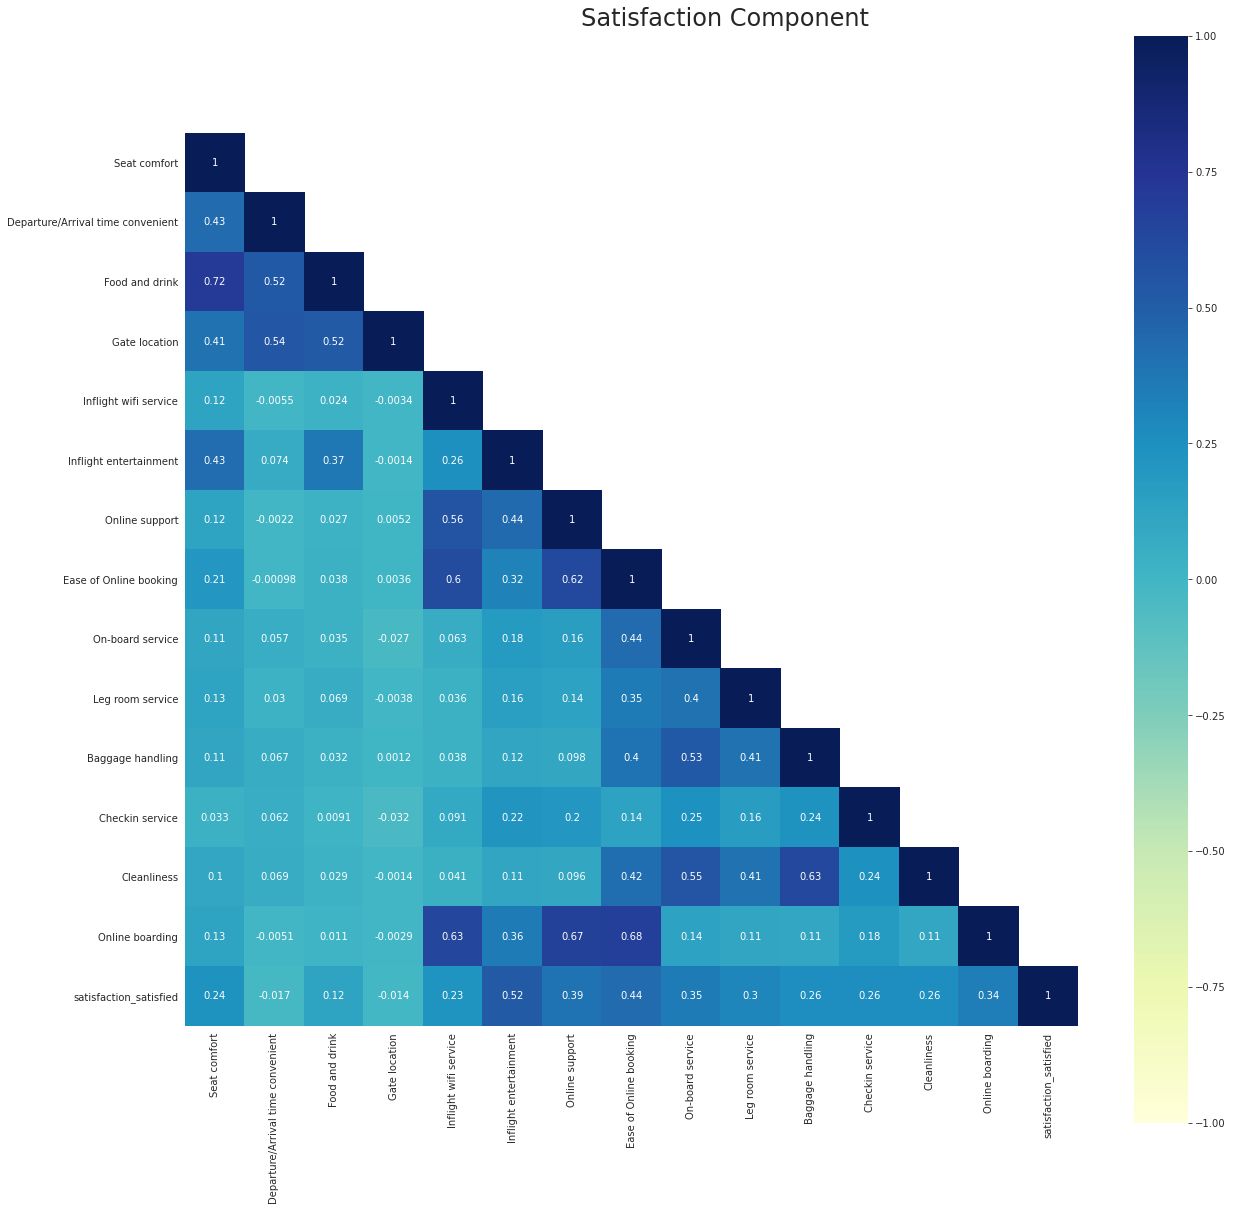

In [49]:
# tulis kolom yang ingin dianalisis korelasinya 
interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'satisfaction_satisfied']

# hitung korelasi antar kolom
corr_dat = corr[interested_columns].corr()

# visualisasikan korelasinya 
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask,vmax=1,vmin=-1, square=True, annot=True, ax = ax,cmap='YlGnBu')
fig.suptitle('Satisfaction Component',fontsize=24,y=0.9)



Text(0.5, 0.9, 'Business Class')

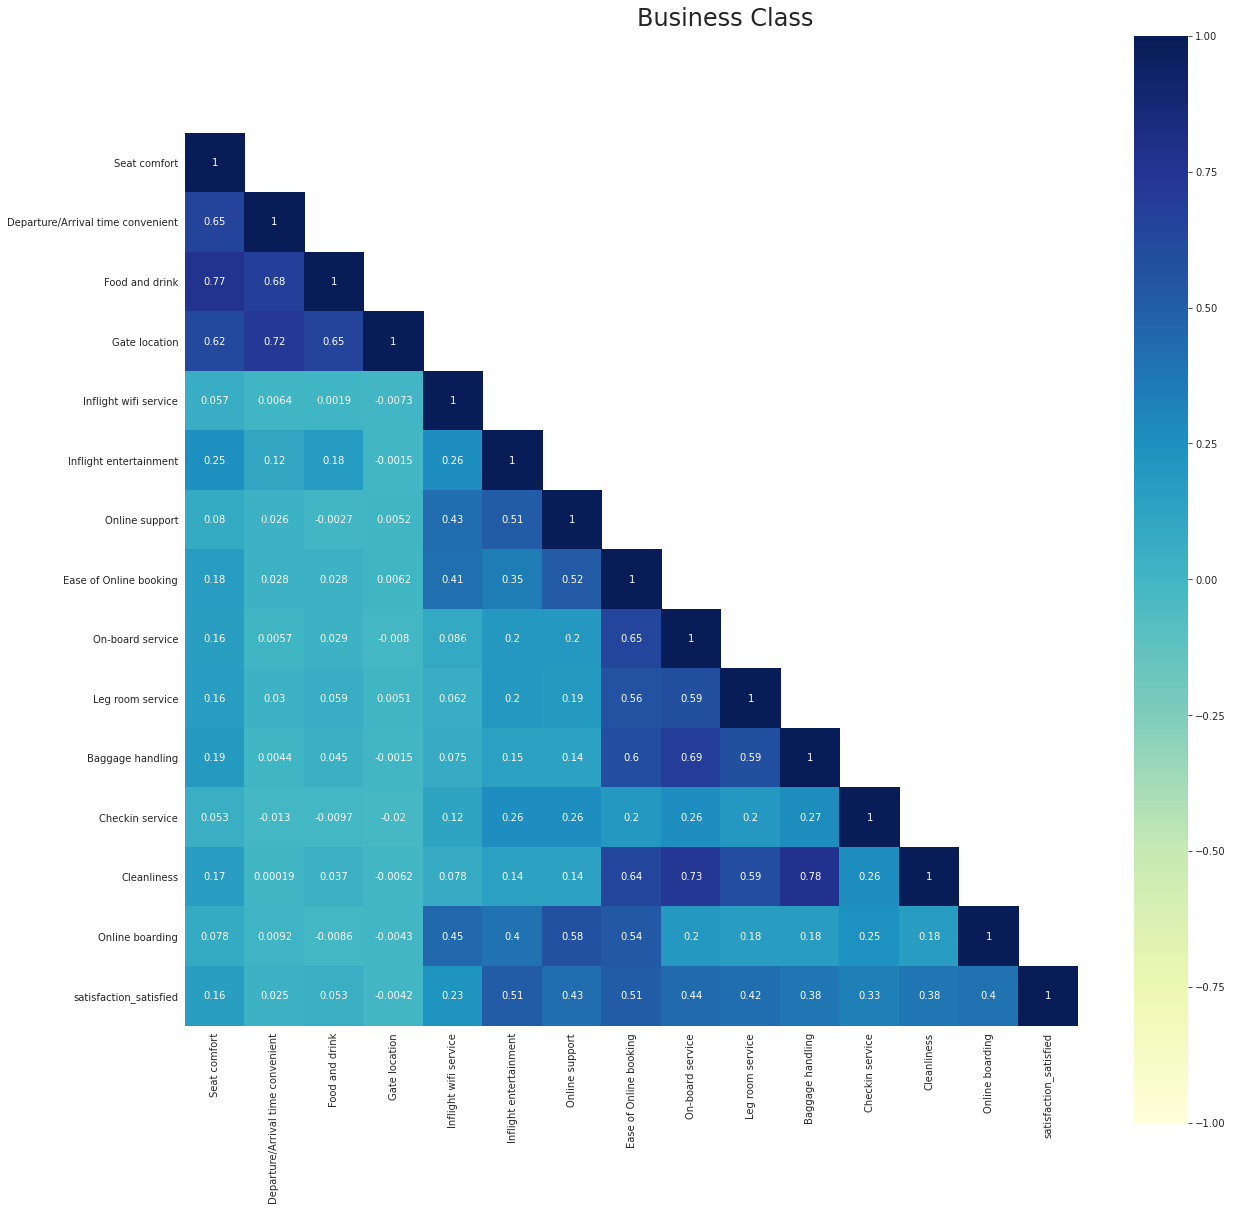

In [50]:
# tulis kolom yang ingin dianalisis korelasinya 
interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'satisfaction_satisfied']

# hitung korelasi antar kolom
corr_dat = corr.loc[corr['Class_Business']==1,interested_columns].corr()

# visualisasikan korelasinya 
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask,vmax=1,vmin=-1, square=True, annot=True, ax = ax,cmap='YlGnBu')

fig.suptitle('Business Class',fontsize=24,y=0.9)


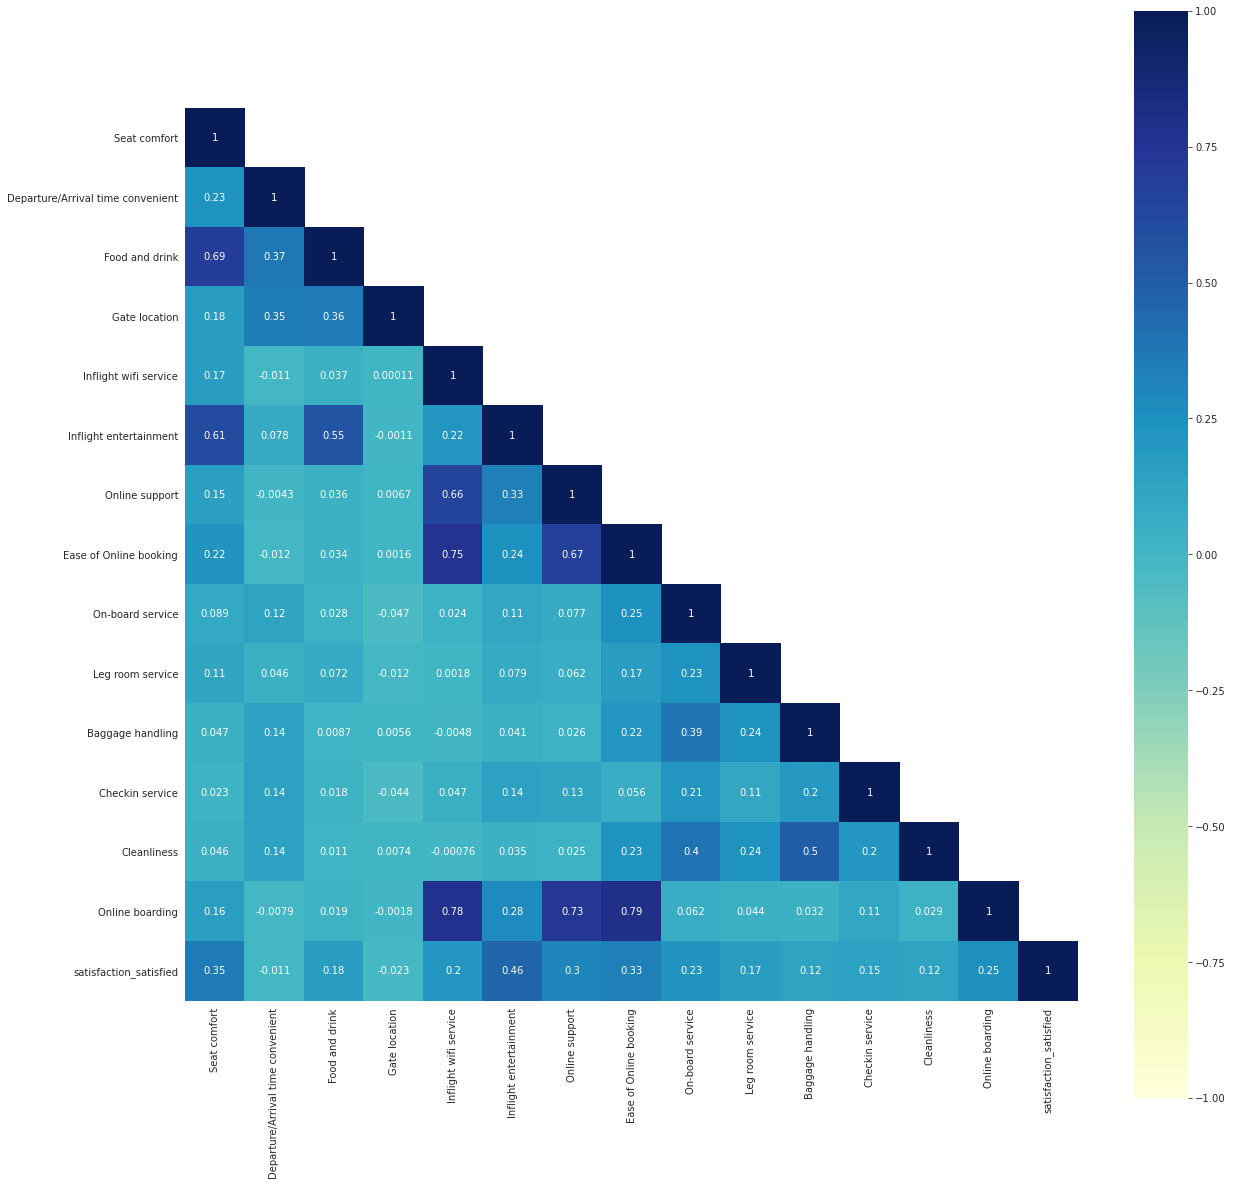

In [51]:
# tulis kolom yang ingin dianalisis korelasinya 
interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'satisfaction_satisfied']

# hitung korelasi antar kolom
corr_dat = corr.loc[corr['Class_Eco']==1,interested_columns].corr()

# visualisasikan korelasinya 
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask,vmax=1,vmin=-1, square=True, annot=True, ax = ax,cmap='YlGnBu')

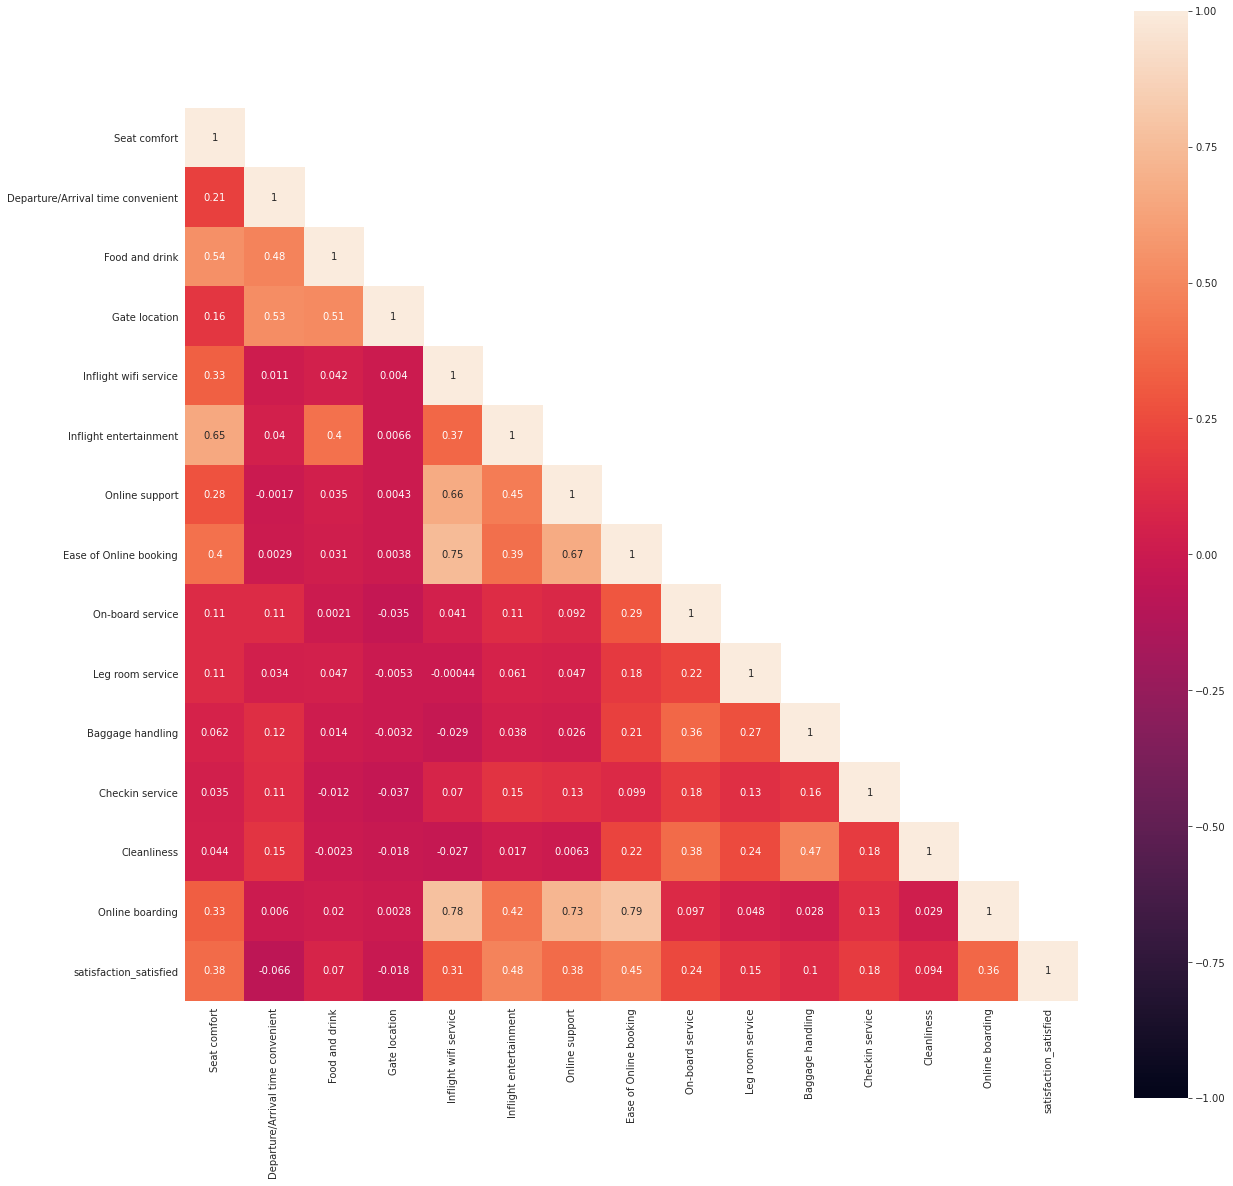

In [52]:
# tulis kolom yang ingin dianalisis korelasinya 
interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'satisfaction_satisfied']

# hitung korelasi antar kolom
corr_dat = corr.loc[corr['Class_Eco Plus']==1,interested_columns].corr()

# visualisasikan korelasinya 
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask,vmax=1,vmin=-1, square=True, annot=True, ax = ax)

Text(0.5, 0.9, 'Eco Class')

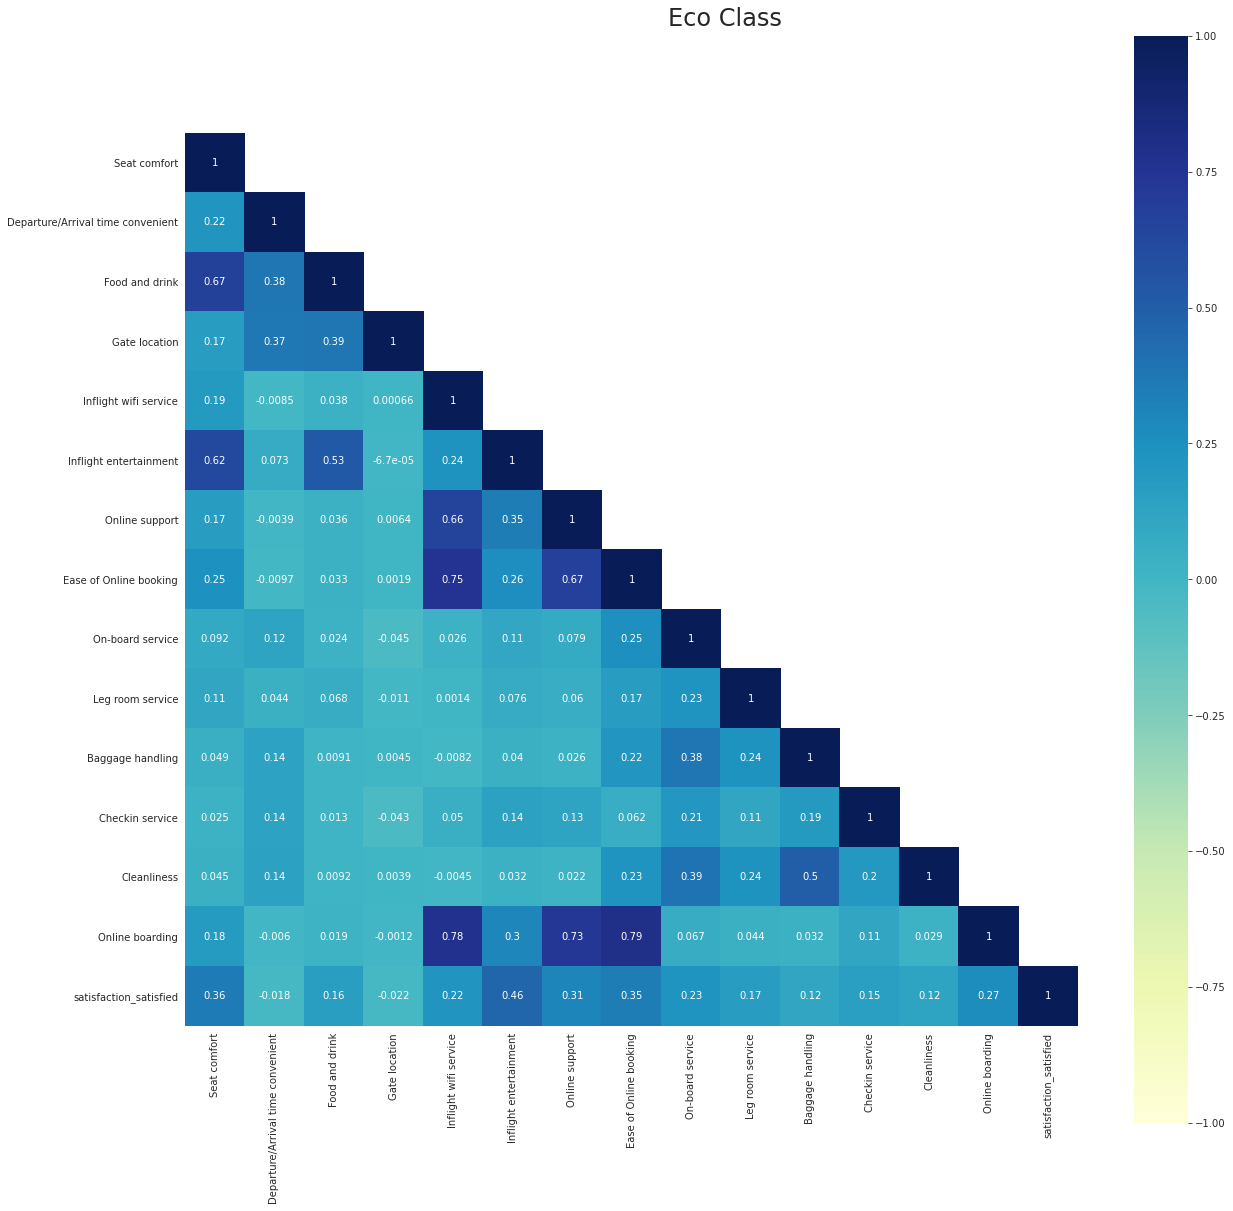

In [53]:
# tulis kolom yang ingin dianalisis korelasinya 
interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'satisfaction_satisfied']

# hitung korelasi antar kolom
corr_dat = corr.loc[corr['Class_Business']==0,interested_columns].corr()

# visualisasikan korelasinya 
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask,vmax=1,vmin=-1, square=True, annot=True, ax = ax,cmap='YlGnBu')

fig.suptitle('Eco Class',fontsize=24,y=0.9)


# modelling

## random forest

random forest
roc uac
[0.98857315 0.98705594 0.98736237 0.98717343 0.98791694]


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


accuracy
[0.94518017 0.94256237 0.93886665 0.93940561 0.94040653]


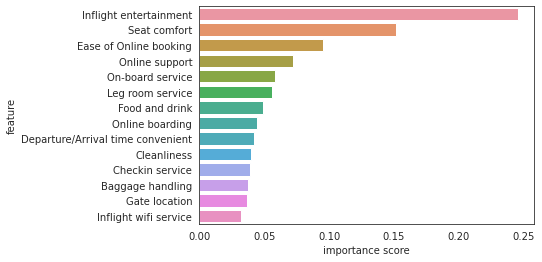

In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier


kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)

def classification_report_with_rocauc_score(y_true, y_pred):
    print (classification_report(y_true, y_pred)) # print classification report
    return roc_auc_score(y_true, y_pred)

interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)

rf_score = cross_val_score(model_rf, corr[interested_columns], corr['satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('random forest')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_rf, corr[interested_columns], corr['satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_rf.fit(corr[interested_columns], corr['satisfaction_satisfied'])

importance = model_rf.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance)), 
               columns =['feature', 'importance score'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




ax = sns.barplot(x='importance score', y='feature',data=df,orient="h")



## XGB

XGB
roc uac
[0.99014679 0.98892595 0.98887056 0.98885411 0.98882833]
accuracy
[0.94464121 0.94009855 0.93771173 0.94056052 0.93848168]


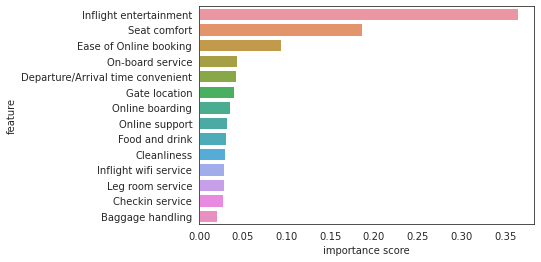

In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import plot_importance

kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)

def classification_report_with_rocauc_score(y_true, y_pred):
    print (classification_report(y_true, y_pred)) # print classification report
    return roc_auc_score(y_true, y_pred)

interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}


params_xgb ={}

model_xgb = xgboost.XGBClassifier(**params_xgb)

rf_score = cross_val_score(model_xgb, corr[interested_columns], corr['satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('XGB')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_xgb, corr[interested_columns], corr['satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_xgb.fit(corr[interested_columns], corr['satisfaction_satisfied'])
# plot feature importance
importance = model_xgb.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance)), 
               columns =['feature', 'importance score'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




ax = sns.barplot(x='importance score', y='feature',data=df,orient="h")


## Logistic Regression

XGB
roc uac
[0.87617233 0.88359841 0.88167642 0.87991014 0.88237835]
accuracy
[0.80235602 0.80820758 0.80635972 0.8038959  0.80666769]


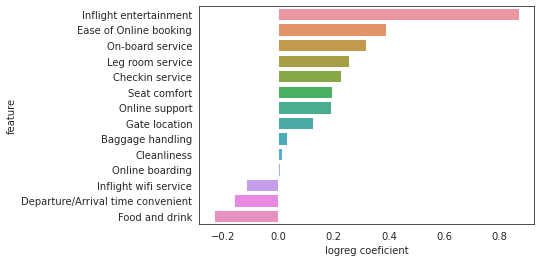

In [56]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import plot_importance

kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)

def classification_report_with_rocauc_score(y_true, y_pred):
    print (classification_report(y_true, y_pred)) # print classification report
    return roc_auc_score(y_true, y_pred)

interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}



model_lgr = LogisticRegression(random_state=0)

rf_score = cross_val_score(model_lgr, corr[interested_columns], corr['satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('XGB')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_lgr, corr[interested_columns], corr['satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_lgr.fit(corr[interested_columns], corr['satisfaction_satisfied'])
# plot feature importance
importance = model_lgr.coef_

df = pd.DataFrame(list(zip(interested_columns, importance[0])), 
               columns =['feature', 'logreg coeficient'])

df.sort_values(by=['logreg coeficient'],inplace=True,ascending=False)




sns.barplot(x='logreg coeficient', y='feature',data=df,orient="h")


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


random forest
roc uac
[0.98857315 0.98705594 0.98736237 0.98717343 0.98791694]
accuracy
[0.94518017 0.94256237 0.93886665 0.93940561 0.94040653]
XGB
roc uac
[0.99014679 0.98892595 0.98887056 0.98885411 0.98882833]
accuracy
[0.94464121 0.94009855 0.93771173 0.94056052 0.93848168]
Logistic Reg
roc uac
[0.87617233 0.88359841 0.88167642 0.87991014 0.88237835]
accuracy
[0.80235602 0.80820758 0.80635972 0.8038959  0.80666769]


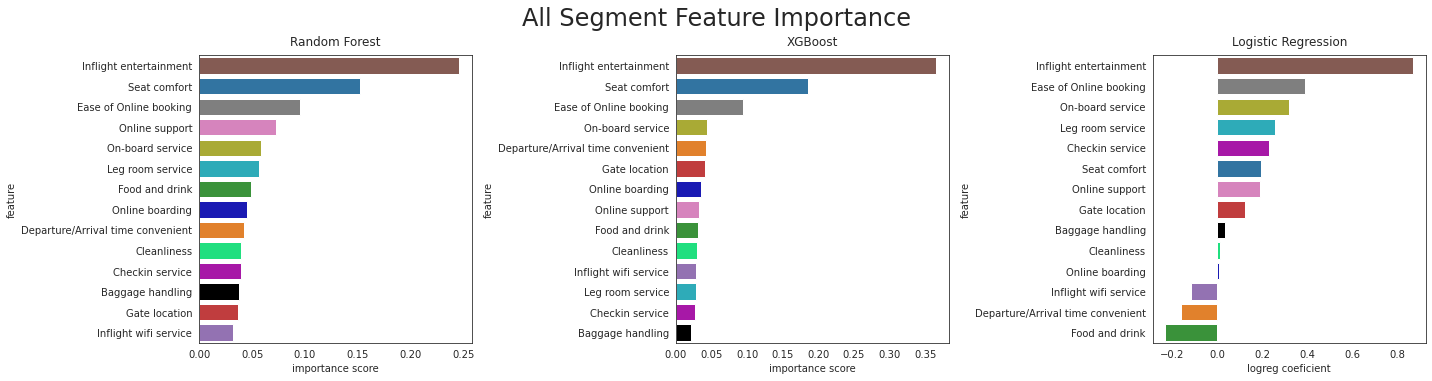

In [57]:
fig = plt.figure(figsize=(20,5))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)


interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

colors = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan',
'k',
'm',
'springgreen',
'mediumblue']

# random forest

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)

rf_score = cross_val_score(model_rf, corr[interested_columns], corr['satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('random forest')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_rf, corr[interested_columns], corr['satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_rf.fit(corr[interested_columns], corr['satisfaction_satisfied'])

importance = model_rf.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance,colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax1,palette=df['colors'])


# xgb

params_xgb ={}

model_xgb = xgboost.XGBClassifier(**params_xgb)

rf_score = cross_val_score(model_xgb, corr[interested_columns], corr['satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('XGB')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_xgb, corr[interested_columns], corr['satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_xgb.fit(corr[interested_columns], corr['satisfaction_satisfied'])
# plot feature importance
importance = model_xgb.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance,colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)


sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax2,palette=df['colors'])

# logistic reg


model_lgr = LogisticRegression(random_state=0)

rf_score = cross_val_score(model_lgr, corr[interested_columns], corr['satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('Logistic Reg')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_lgr, corr[interested_columns], corr['satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_lgr.fit(corr[interested_columns], corr['satisfaction_satisfied'])
# plot feature importance
importance = model_lgr.coef_

df = pd.DataFrame(list(zip(interested_columns, importance[0],colors)), 
               columns =['feature', 'logreg coeficient','colors'])

df.sort_values(by=['logreg coeficient'],inplace=True,ascending=False)




sns.barplot(x='logreg coeficient', y='feature',data=df,orient="h",ax=ax3,palette=df['colors'])



# # mari menggunakan plot bawaan dari pandas
# # formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# # masukan nilai kind = hist
# # melihat distribusi dari humiditas 
# odd_data['Gender'].value_counts().plot(kind='bar', ax=ax1, color = ['deeppink','mediumblue'])

# # melihat distribusi kecepatan angin 
# odd_data['Type of Travel'].value_counts().plot(kind='bar', ax=ax2, color = ['forestgreen','limegreen'])

# # melihat distribusi temperatur
# odd_data['Class'].value_counts().plot(kind='bar', ax=ax3, color = ['firebrick','coral','peachpuff'])

# # melihat distribusi temperatur relatif 
# odd_data['Customer Type'].value_counts().plot(kind='bar', ax=ax4, color = ['darkmagenta','darkorchid'])

# tambahkan judul untuk tiap plot
ax1.set_title("Random Forest", fontdict={'fontsize': '12'}, pad = 10)
ax2.set_title("XGBoost", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Logistic Regression", fontdict={'fontsize': '12'}, pad = 10)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

fig.suptitle('All Segment Feature Importance',fontsize=24,y=1.05)


# rapihkan plot
fig.tight_layout()

In [58]:
sns.barplot(x='logreg coeficient', y='feature',data=df,orient="h",ax=ax3,hue="feature")
fig.tight_layout()

### Business class

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


random forest
roc uac
[0.99367551 0.99186353 0.99370007 0.99231467 0.99194518]
accuracy
[0.96639871 0.9573955  0.96478534 0.96124779 0.95980061]
XGB
roc uac
[0.99578017 0.99404135 0.99549057 0.99453936 0.995261  ]
accuracy
[0.96913183 0.96414791 0.97186043 0.97041325 0.96591092]
Logistic Reg
roc uac
[0.9185477  0.90775631 0.91350493 0.9138821  0.91451454]
accuracy
[0.84501608 0.83810289 0.8422576  0.84322238 0.84418717]


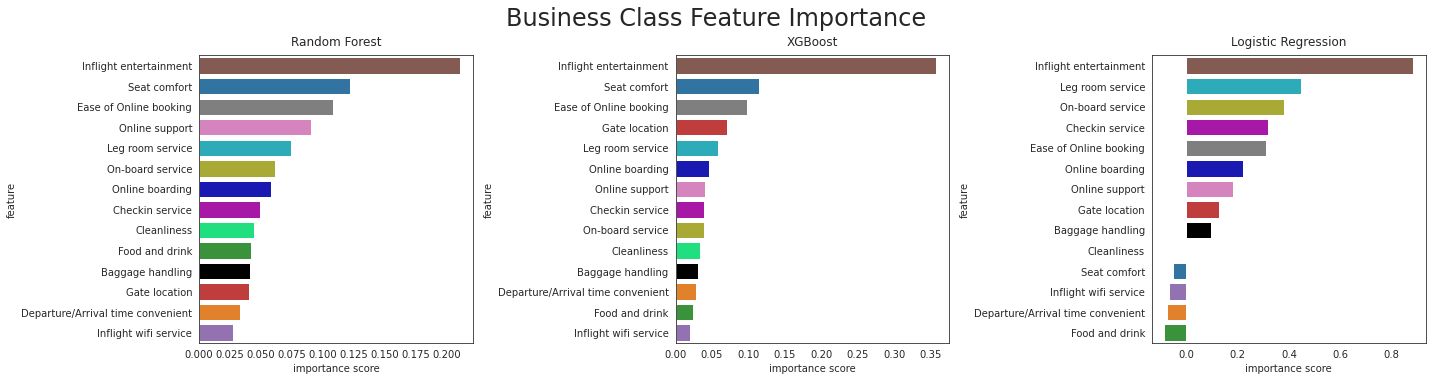

In [59]:
fig = plt.figure(figsize=(20,5))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)


interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

colors = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan',
'k',
'm',
'springgreen',
'mediumblue']


x = corr.loc[corr['Class_Business']==1,interested_columns]
y = corr.loc[corr['Class_Business']==1,'satisfaction_satisfied']

# random forest

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)

rf_score = cross_val_score(model_rf, x, y,scoring='roc_auc', cv=kf, n_jobs=-1)

print ('random forest')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_rf, x, y,scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_rf.fit(x, y)

importance = model_rf.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance,colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax1,palette=df['colors'])


# xgb

params_xgb ={}

model_xgb = xgboost.XGBClassifier(**params_xgb)

rf_score = cross_val_score(model_xgb, x, y,scoring='roc_auc', cv=kf, n_jobs=-1)

print ('XGB')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_xgb, x, y,scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_xgb.fit(x, y)
# plot feature importance
importance = model_xgb.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance,colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax2,palette=df['colors'])

# logistic reg


model_lgr = LogisticRegression(random_state=0)

rf_score = cross_val_score(model_lgr, x, y,scoring='roc_auc', cv=kf, n_jobs=-1)

print ('Logistic Reg')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_lgr, x, y,scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_lgr.fit(x, y)
# plot feature importance
importance = model_lgr.coef_

df = pd.DataFrame(list(zip(interested_columns, importance[0],colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax3,palette=df['colors'])



# # mari menggunakan plot bawaan dari pandas
# # formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# # masukan nilai kind = hist
# # melihat distribusi dari humiditas 
# odd_data['Gender'].value_counts().plot(kind='bar', ax=ax1, color = ['deeppink','mediumblue'])

# # melihat distribusi kecepatan angin 
# odd_data['Type of Travel'].value_counts().plot(kind='bar', ax=ax2, color = ['forestgreen','limegreen'])

# # melihat distribusi temperatur
# odd_data['Class'].value_counts().plot(kind='bar', ax=ax3, color = ['firebrick','coral','peachpuff'])

# # melihat distribusi temperatur relatif 
# odd_data['Customer Type'].value_counts().plot(kind='bar', ax=ax4, color = ['darkmagenta','darkorchid'])

# tambahkan judul untuk tiap plot
ax1.set_title("Random Forest", fontdict={'fontsize': '12'}, pad = 10)
ax2.set_title("XGBoost", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Logistic Regression", fontdict={'fontsize': '12'}, pad = 10)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

fig.suptitle('Business Class Feature Importance',fontsize=24,y=1.05)


# rapihkan plot
fig.tight_layout()

XGB
roc uac
[0.99578017 0.99404135 0.99549057 0.99453936 0.995261  ]
accuracy
[0.96913183 0.96414791 0.97186043 0.97041325 0.96591092]


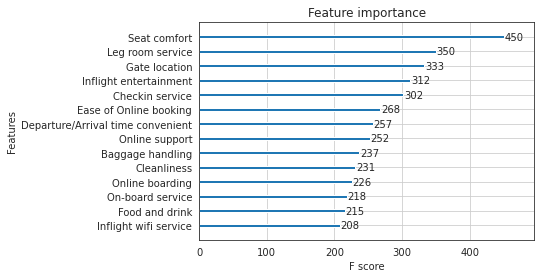

In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import plot_importance

kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)

def classification_report_with_rocauc_score(y_true, y_pred):
    print (classification_report(y_true, y_pred)) # print classification report
    return roc_auc_score(y_true, y_pred)

interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}


params_xgb ={}

model_xgb = xgboost.XGBClassifier(**params_xgb)

rf_score = cross_val_score(model_xgb, corr.loc[corr['Class_Business']==1,interested_columns], corr.loc[corr['Class_Business']==1,'satisfaction_satisfied'],scoring='roc_auc', cv=kf, n_jobs=-1)

print ('XGB')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_xgb, corr.loc[corr['Class_Business']==1,interested_columns], corr.loc[corr['Class_Business']==1,'satisfaction_satisfied'],scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_xgb.fit(corr.loc[corr['Class_Business']==1,interested_columns], corr.loc[corr['Class_Business']==1,'satisfaction_satisfied'])
# plot feature importance
plot_importance(model_xgb)
plt.show()

### non business class

random forest
roc uac
[0.98153682 0.97816081 0.98074718 0.97948035 0.9797876 ]
accuracy
[0.93027035 0.92007682 0.92155414 0.92169031 0.92375887]
XGB
roc uac
[0.98116527 0.98083602 0.98108213 0.98179017 0.98156186]
accuracy
[0.92480425 0.92244054 0.91948589 0.92390662 0.92109929]
Logistic Reg
roc uac
[0.83801032 0.84118655 0.84749406 0.84274395 0.84051702]
accuracy
[0.80070912 0.80543655 0.8120845  0.80836288 0.80481678]


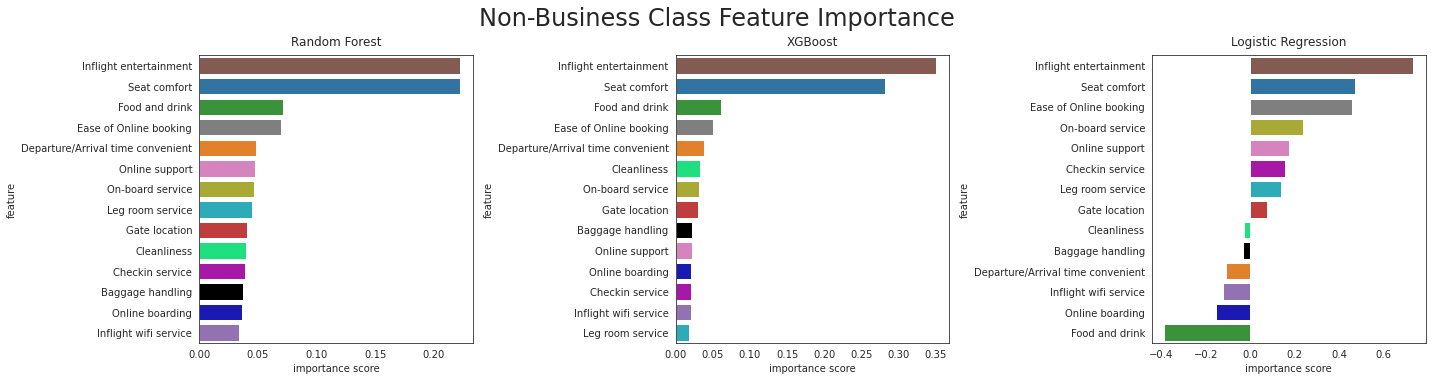

In [61]:
fig = plt.figure(figsize=(20,5))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



kf = StratifiedKFold(n_splits=5,random_state=32,shuffle=True)


interested_columns = ['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
       ]

colors = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan',
'k',
'm',
'springgreen',
'mediumblue']


x = corr.loc[corr['Class_Business']==0,interested_columns]
y = corr.loc[corr['Class_Business']==0,'satisfaction_satisfied']

# random forest

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 800,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)

rf_score = cross_val_score(model_rf, x, y,scoring='roc_auc', cv=kf, n_jobs=-1)

print ('random forest')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_rf, x, y,scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_rf.fit(x, y)

importance = model_rf.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance,colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax1,palette=df['colors'])


# xgb

params_xgb ={}

model_xgb = xgboost.XGBClassifier(**params_xgb)

rf_score = cross_val_score(model_xgb, x, y,scoring='roc_auc', cv=kf, n_jobs=-1)

print ('XGB')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_xgb, x, y,scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_xgb.fit(x, y)
# plot feature importance
importance = model_xgb.feature_importances_

df = pd.DataFrame(list(zip(interested_columns, importance,colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax2,palette=df['colors'])

# logistic reg


model_lgr = LogisticRegression(random_state=0)

rf_score = cross_val_score(model_lgr, x, y,scoring='roc_auc', cv=kf, n_jobs=-1)

print ('Logistic Reg')
print ('roc uac')
print(rf_score)

rf_score = cross_val_score(model_lgr, x, y,scoring="accuracy", cv=kf, n_jobs=-1)
print ('accuracy')
print(rf_score)

model_lgr.fit(x, y)
# plot feature importance
importance = model_lgr.coef_

df = pd.DataFrame(list(zip(interested_columns, importance[0],colors)), 
               columns =['feature', 'importance score','colors'])

df.sort_values(by=['importance score'],inplace=True,ascending=False)




sns.barplot(x='importance score', y='feature',data=df,orient="h", ax=ax3,palette=df['colors'])



# # mari menggunakan plot bawaan dari pandas
# # formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# # masukan nilai kind = hist
# # melihat distribusi dari humiditas 
# odd_data['Gender'].value_counts().plot(kind='bar', ax=ax1, color = ['deeppink','mediumblue'])

# # melihat distribusi kecepatan angin 
# odd_data['Type of Travel'].value_counts().plot(kind='bar', ax=ax2, color = ['forestgreen','limegreen'])

# # melihat distribusi temperatur
# odd_data['Class'].value_counts().plot(kind='bar', ax=ax3, color = ['firebrick','coral','peachpuff'])

# # melihat distribusi temperatur relatif 
# odd_data['Customer Type'].value_counts().plot(kind='bar', ax=ax4, color = ['darkmagenta','darkorchid'])

# tambahkan judul untuk tiap plot
ax1.set_title("Random Forest", fontdict={'fontsize': '12'}, pad = 10)
ax2.set_title("XGBoost", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Logistic Regression", fontdict={'fontsize': '12'}, pad = 10)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

fig.suptitle('Non-Business Class Feature Importance',fontsize=24,y=1.05)


# rapihkan plot
fig.tight_layout()

# After Model Analysis

## Business class

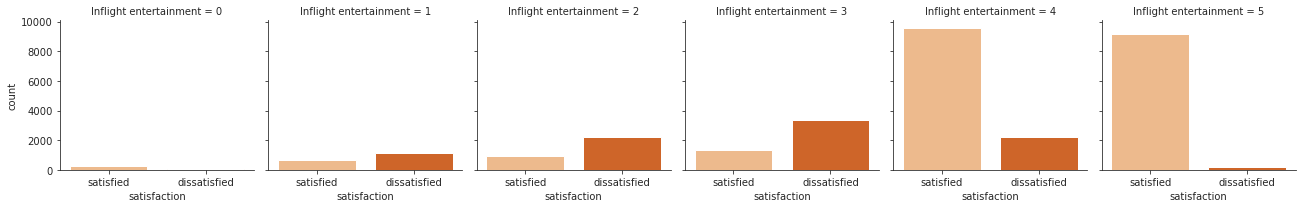

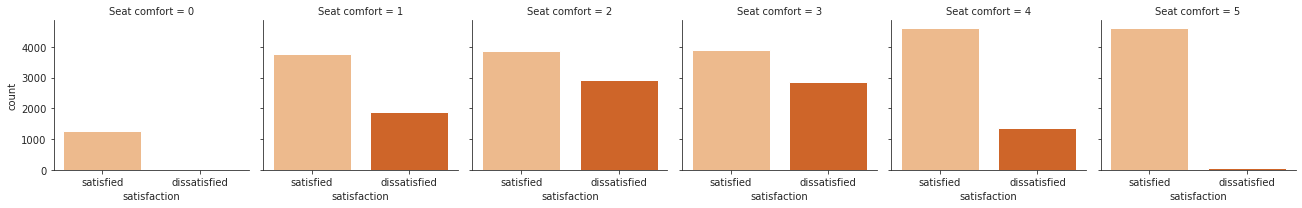

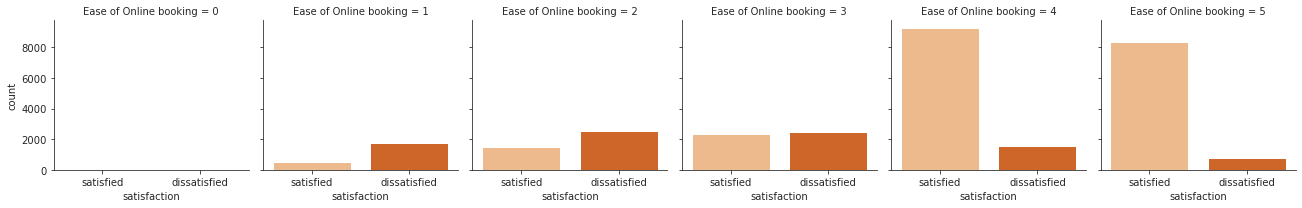

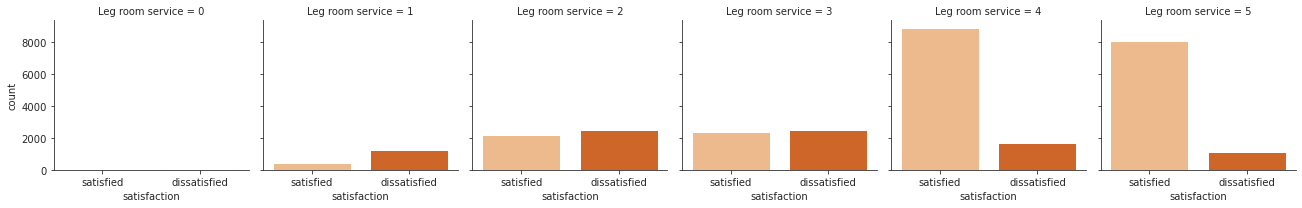

In [62]:


satisfy_col = ['Inflight entertainment', 'Seat comfort','Ease of Online booking','Leg room service']



df = odd_data.loc[odd_data['Class']=='Business'].copy()
df.loc[df.iloc[[-1]].index,satisfy_col]=0

with sns.axes_style(style='ticks'):
    
    for i in satisfy_col:
    
        g = sns.catplot("satisfaction", col=i, col_wrap=6, data=df, kind="count", height=3, aspect=1,palette='Oranges')
        

    

## Personal class

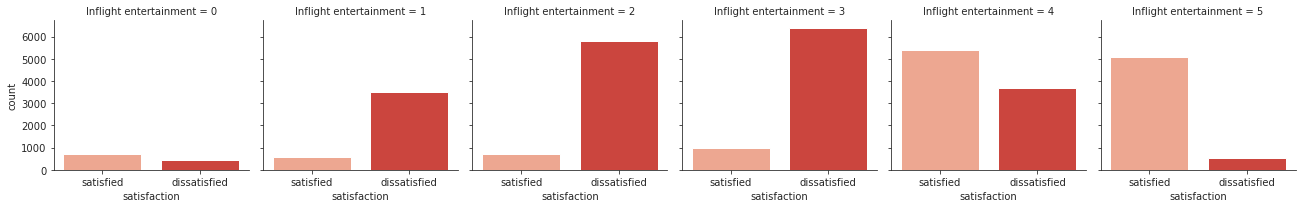

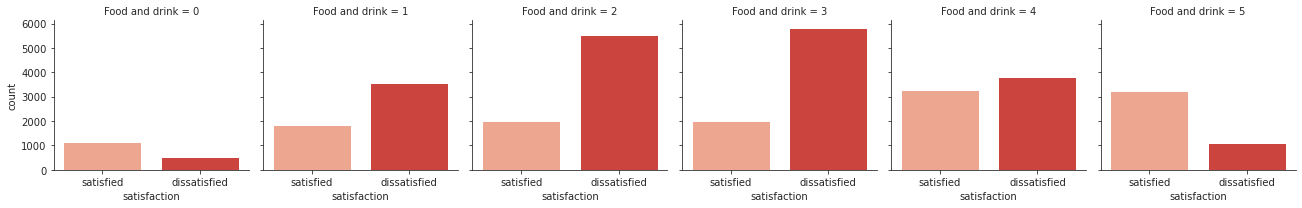

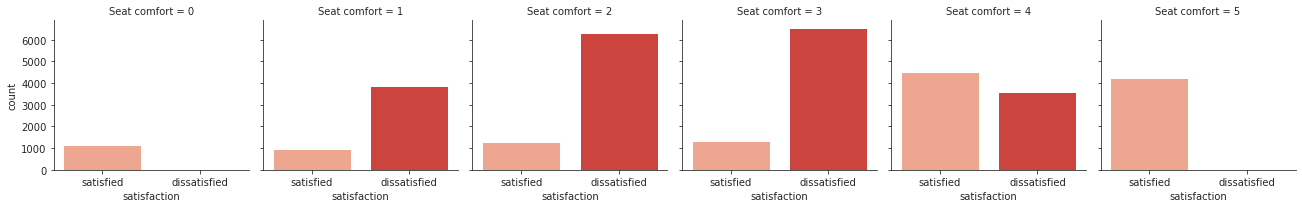

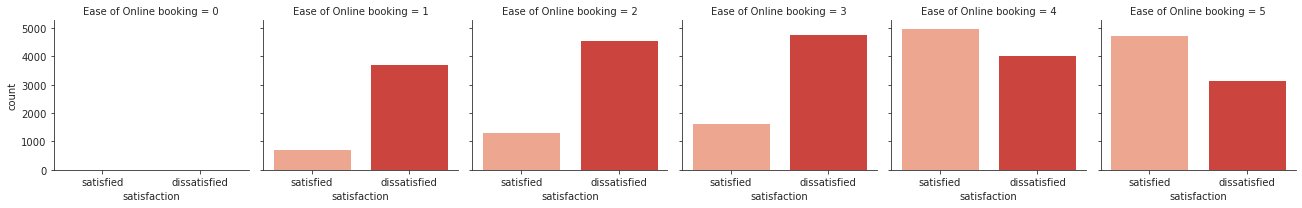

In [63]:


satisfy_col = ['Inflight entertainment','Food and drink', 'Seat comfort','Ease of Online booking',]



df = odd_data.loc[odd_data['Class']!='Business'].copy()
df.loc[df.iloc[[-1]].index,satisfy_col]=0

with sns.axes_style(style='ticks'):
    
    for i in satisfy_col:
    
        g = sns.catplot("satisfaction", col=i, col_wrap=6, data=df, kind="count", height=3, aspect=1,palette='Reds')
    